In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings

#SCIKIT LEARN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split,RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, auc,roc_curve,classification_report,roc_auc_score,f1_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from scipy.stats import chisquare, chi2_contingency
from sklearn import tree

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

#sns.set_color_palette("tab10")

## Przygotowanie danych

In [3]:
df_final = pd.read_csv('Scrapper/data_cleared_final.csv',index_col = [0])
df_full = df_final.copy()
df_full.head()

,FIGHT_URL,WEIGHT_CLASS,WINNER,FINISH_METHOD,WEIGHT_CLASS.1,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_TD_PERC,BLUE_TD_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND
1,http://ufcstats.com/fight-details/c483ac06b1e3...,Welterweight Title,RED,50,15,31,35,0.973684,1.027778,0,0,74,42,0,26,0,0,0,0,0,303,123,113,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,41.67,6,6.90,111,92.50,65,74.71,9,7.50,21,24.14,0,0.0,1,1.15
2,http://ufcstats.com/fight-details/90a83875e1d1...,Lightweight,RED,50,4,34,29,0.985915,1.044118,0,0,60,57,33,0,0,0,0,0,5,0,106,97,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7.77,7,7.22,84,81.55,81,83.51,19,18.45,16,16.49,0,0.0,0,0.00
3,http://ufcstats.com/fight-details/019b4d006800...,Welterweight,RED,100,5,34,33,1.000000,0.986111,0,0,90,58,50,0,1,0,0,0,193,0,20,18,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,0.00,4,57.14,1,10.00,6,85.71,2,20.00,0,0.00,7,70.0,1,14.29
4,http://ufcstats.com/fight-details/dd9cbf6d6284...,Women's Flyweight,RED,75,102,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,0,0,83,0,151,137,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,7.59,5,3.65,124,85.52,129,94.16,21,14.48,8,5.84,0,0.0,0,0.00
5,http://ufcstats.com/fight-details/5e9c027fb24e...,Middleweight,RED,75,6,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,0,0,14,106,71,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,35.85,8,11.27,100,94.34,67,94.37,6,5.66,4,5.63,0,0.0,0,0.00


In [4]:
len(df_full)

2579

In [5]:
df_full.drop(['BLUE_TD_PERC','RED_TD_PERC','WEIGHT_CLASS.1'], axis = 1,inplace = True)

In [6]:
df_full['RED_BODY_PART_FOCUS'] =  np.where(df_full['RED_LANDED_PERC_HEAD']>60,1,
                                  np.where(df_full['RED_LANDED_PERC_BODY']>60,2,
                                  np.where(df_full['RED_LANDED_PERC_LEG']>60,3,4)))
                                        
df_full['BLUE_BODY_PART_FOCUS'] = np.where(df_full['BLUE_LANDED_PERC_HEAD']>60,1,
                                  np.where(df_full['BLUE_LANDED_PERC_BODY']>60,2,
                                  np.where(df_full['BLUE_LANDED_PERC_LEG']>60,3,4)))

In [7]:
df_full['RED_POSITION_FOCUS'] = df_full.loc[:,['RED_LANDED_PERC_DISTANCE','RED_LANDED_PERC_CLINCH','RED_LANDED_PERC_GROUND']].idxmax(axis=1)
df_full['BLUE_POSITION_FOCUS'] = df_full.loc[:,['BLUE_LANDED_PERC_DISTANCE','BLUE_LANDED_PERC_CLINCH','BLUE_LANDED_PERC_GROUND']].idxmax(axis=1)

In [8]:
df_full['RED_POSITION_FOCUS']  = np.where(df_full['RED_POSITION_FOCUS']  == 'RED_LANDED_PERC_DISTANCE',1,
                                 np.where(df_full['RED_POSITION_FOCUS']  == 'RED_LANDED_PERC_CLINCH',2,3))
df_full['BLUE_POSITION_FOCUS'] = np.where(df_full['BLUE_POSITION_FOCUS'] == 'BLUE_LANDED_PERC_DISTANCE',1,
                                 np.where(df_full['BLUE_POSITION_FOCUS'] == 'BLUE_LANDED_PERC_CLINCH',2,3))


In [9]:
df_full.WEIGHT_CLASS = df_full.WEIGHT_CLASS.replace(to_replace= r' Title', value = '', regex = True)

In [10]:
df_full.drop(index=df_full[df_full['WEIGHT_CLASS'] == 'Catch Weight'].index,inplace = True)

In [11]:
df_full['GENDER'] = np.where(df_full['WEIGHT_CLASS'].str.contains('Women'),0,1)

In [12]:
df_full.head()

,FIGHT_URL,WEIGHT_CLASS,WINNER,FINISH_METHOD,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS,GENDER
1,http://ufcstats.com/fight-details/c483ac06b1e3...,Welterweight,RED,50,31,35,0.973684,1.027778,0,0,74,42,0,0,0,0,0,303,123,113,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,41.67,6,6.90,111,92.50,65,74.71,9,7.50,21,24.14,0,0.0,1,1.15,4,1,1,1,1
2,http://ufcstats.com/fight-details/90a83875e1d1...,Lightweight,RED,50,34,29,0.985915,1.044118,0,0,60,57,0,0,0,0,5,0,106,97,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7.77,7,7.22,84,81.55,81,83.51,19,18.45,16,16.49,0,0.0,0,0.00,1,4,1,1,1
3,http://ufcstats.com/fight-details/019b4d006800...,Welterweight,RED,100,34,33,1.000000,0.986111,0,0,90,58,1,0,0,0,193,0,20,18,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,0.00,4,57.14,1,10.00,6,85.71,2,20.00,0,0.00,7,70.0,1,14.29,1,4,3,1,1
4,http://ufcstats.com/fight-details/dd9cbf6d6284...,Women's Flyweight,RED,75,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,83,0,151,137,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,7.59,5,3.65,124,85.52,129,94.16,21,14.48,8,5.84,0,0.0,0,0.00,1,1,1,1,0
5,http://ufcstats.com/fight-details/5e9c027fb24e...,Middleweight,RED,75,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,14,106,71,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,35.85,8,11.27,100,94.34,67,94.37,6,5.66,4,5.63,0,0.0,0,0.00,4,1,1,1,1


## Eksploracyjna Analiza Danych

In [71]:
df_full.head()

,FIGHT_URL,WEIGHT_CLASS,WINNER,FINISH_METHOD,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS,GENDER
1,http://ufcstats.com/fight-details/c483ac06b1e3...,Welterweight,RED,50,31,35,0.973684,1.027778,0,0,74,42,0,0,0,0,0,303,123,113,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,41.67,6,6.90,111,92.50,65,74.71,9,7.50,21,24.14,0,0.0,1,1.15,4,1,1,1,1
2,http://ufcstats.com/fight-details/90a83875e1d1...,Lightweight,RED,50,34,29,0.985915,1.044118,0,0,60,57,0,0,0,0,5,0,106,97,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7.77,7,7.22,84,81.55,81,83.51,19,18.45,16,16.49,0,0.0,0,0.00,1,4,1,1,1
3,http://ufcstats.com/fight-details/019b4d006800...,Welterweight,RED,100,34,33,1.000000,0.986111,0,0,90,58,1,0,0,0,193,0,20,18,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,0.00,4,57.14,1,10.00,6,85.71,2,20.00,0,0.00,7,70.0,1,14.29,1,4,3,1,1
4,http://ufcstats.com/fight-details/dd9cbf6d6284...,Women's Flyweight,RED,75,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,83,0,151,137,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,7.59,5,3.65,124,85.52,129,94.16,21,14.48,8,5.84,0,0.0,0,0.00,1,1,1,1,0
5,http://ufcstats.com/fight-details/5e9c027fb24e...,Middleweight,RED,75,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,14,106,71,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,35.85,8,11.27,100,94.34,67,94.37,6,5.66,4,5.63,0,0.0,0,0.00,4,1,1,1,1


In [14]:
df_grouped_m = df_full.loc[df_full['GENDER']==1][['WEIGHT_CLASS','WINNER']].groupby(by = ['WEIGHT_CLASS']).count()
df_grouped_w = df_full.loc[df_full['GENDER']==0][['WEIGHT_CLASS','WINNER']].groupby(by = ['WEIGHT_CLASS']).count()
#df_grouped_no_title = df_grouped.filter( regex = r"^((?!Title).)*$",axis = 0)
#df_grouped_title = df_grouped.filter( like ='Title',axis = 0)


In [15]:
df_full_w = df_full.WEIGHT_CLASS.replace(to_replace= r'Women''s ', value = '', regex = True)

In [16]:
df_grouped_w

,WINNER
WEIGHT_CLASS,
Women's Bantamweight,89
Women's Featherweight,24
Women's Flyweight,181
Women's Strawweight,157


In [17]:
df_grouped_w

,WINNER
WEIGHT_CLASS,
Women's Bantamweight,89
Women's Featherweight,24
Women's Flyweight,181
Women's Strawweight,157


In [22]:
reorderlist = ['Flyweight','Bantamweight','Featherweight','Lightweight','Welterweight','Middleweight','Light Heavyweight',
              'Heavyweight']

[Text(0, 0, '131'),
 Text(0, 0, '295'),
 Text(0, 0, '302'),
 Text(0, 0, '345'),
 Text(0, 0, '348'),
 Text(0, 0, '277'),
 Text(0, 0, '197'),
 Text(0, 0, '202')]

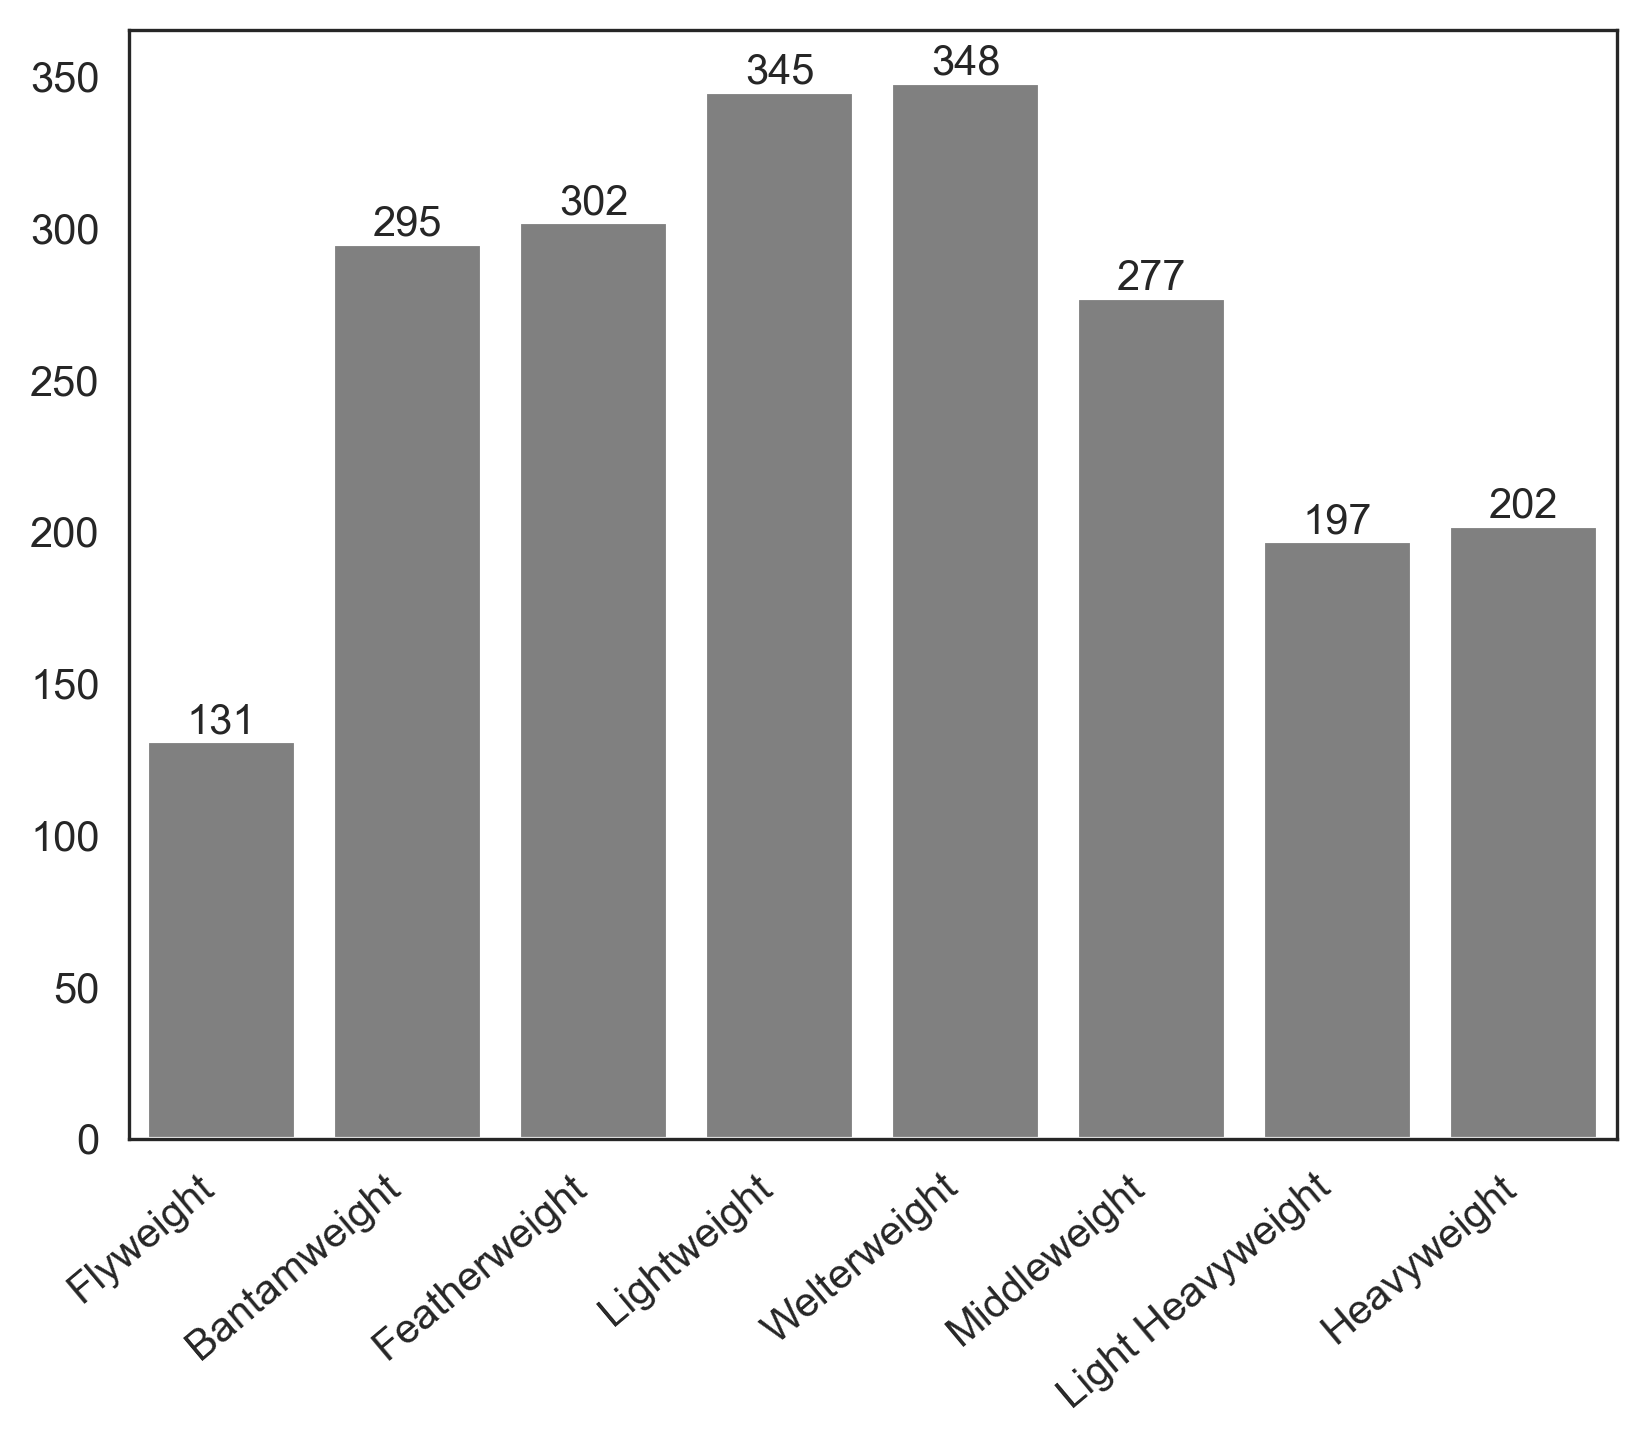

In [23]:
sns.set_style("white")
df_grouped_chart1 = df_grouped_m.reindex(reorderlist) #.sort_values(by = 'WINNER')
cplot = sns.barplot(data = df_grouped_chart1, x = df_grouped_chart1.index, y='WINNER',saturation = 0.7, color = 'grey')
cplot.set(xlabel = None, ylabel = None)
cplot.set_xticklabels(cplot.get_xticklabels(), rotation=40, horizontalalignment='right')
cplot.bar_label(cplot.containers[0])

In [25]:
reorderlist_w = ["Women's Strawweight","Women's Flyweight","Women's Bantamweight","Women's Featherweight"]

[Text(0, 0, '157'), Text(0, 0, '181'), Text(0, 0, '89'), Text(0, 0, '24')]

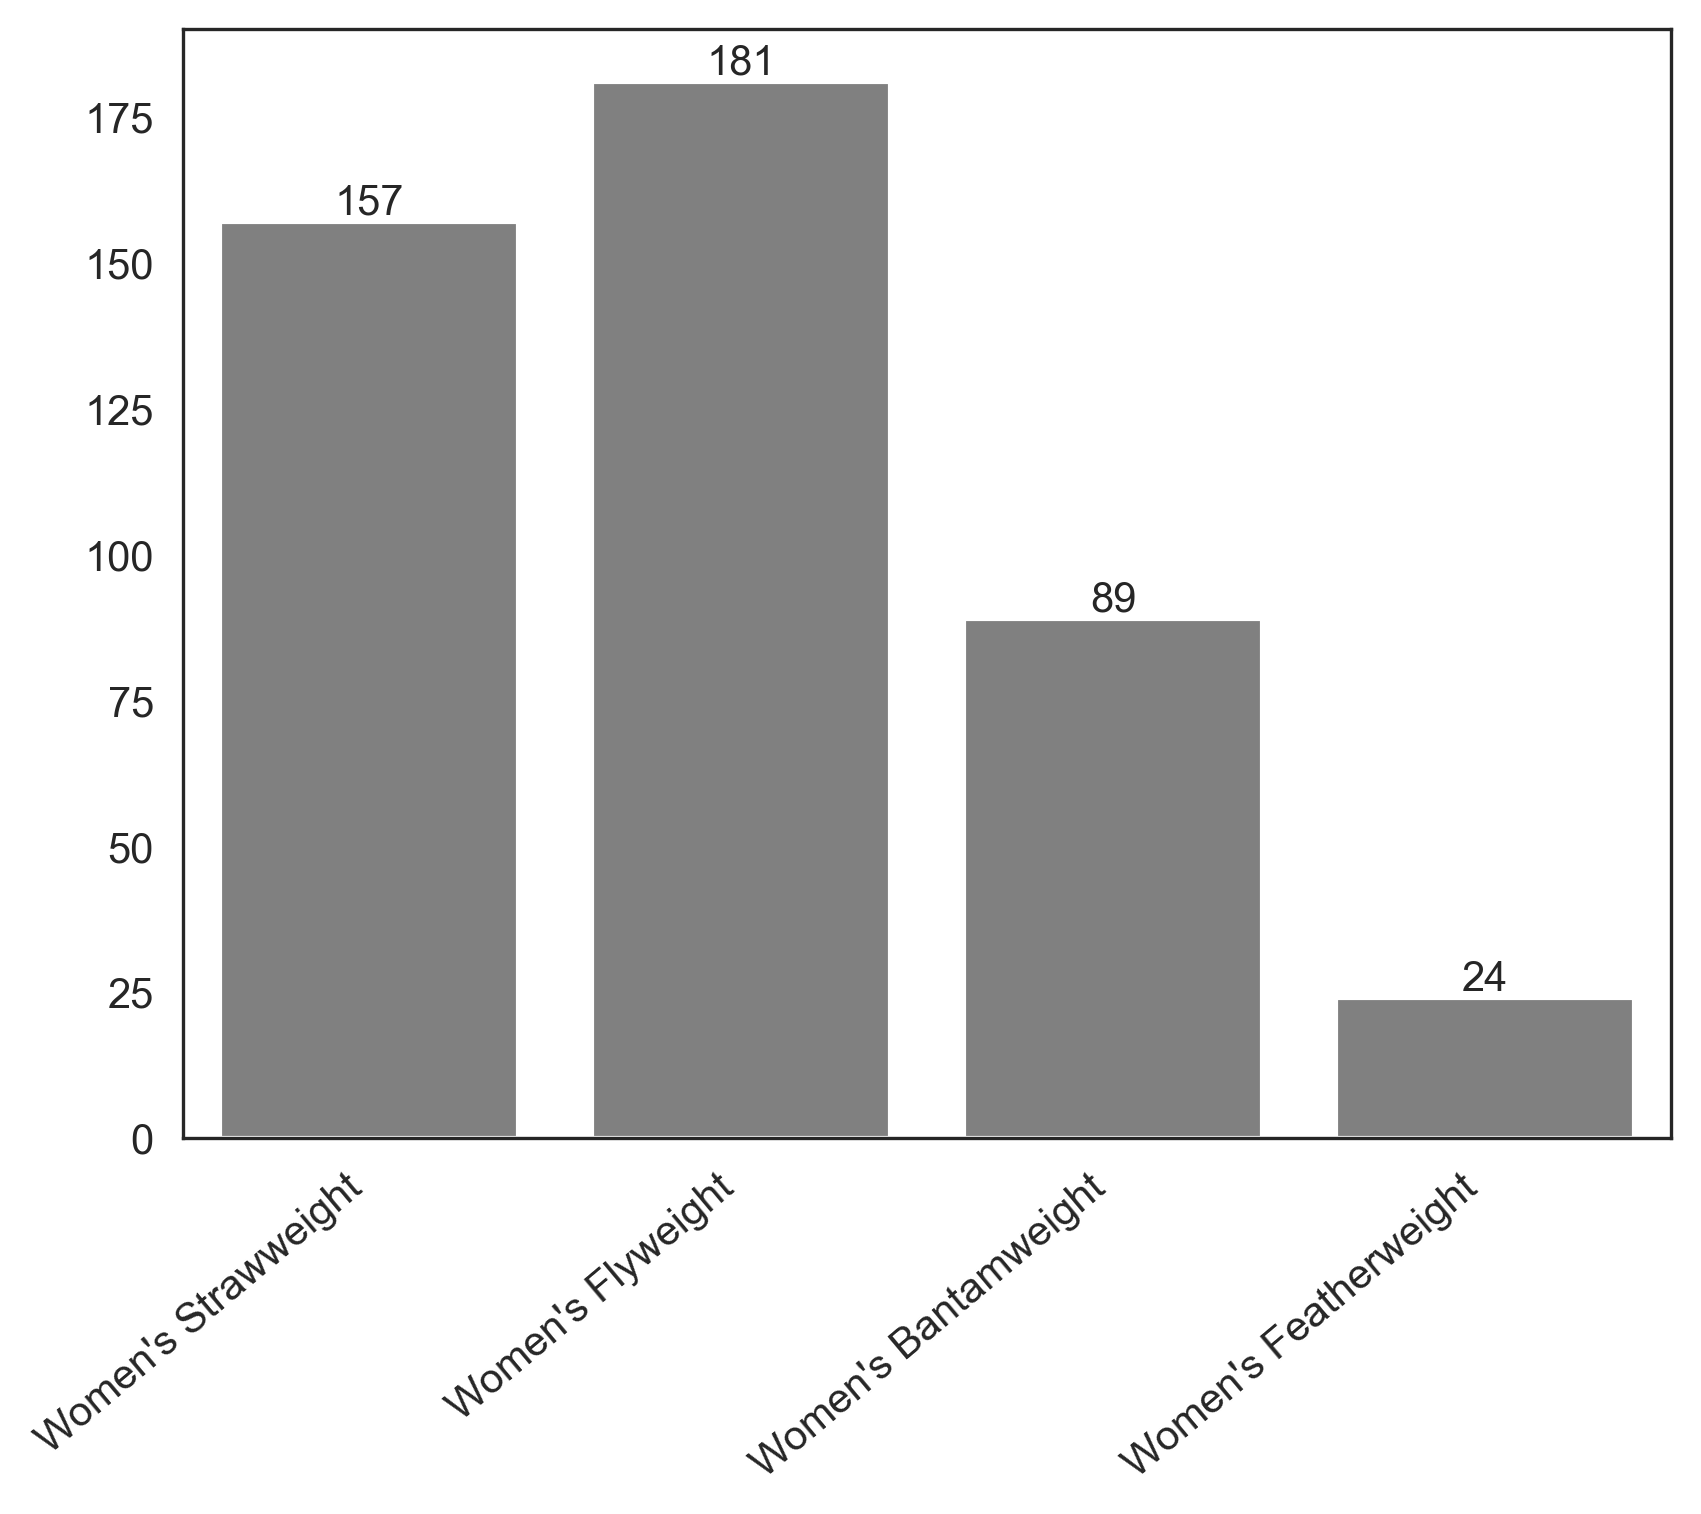

In [26]:
sns.set_style("white")
df_grouped_chart1 = df_grouped_w.reindex(reorderlist_w)
cplot = sns.barplot(data = df_grouped_chart1, x = df_grouped_chart1.index, y='WINNER',saturation = 0.7, color = 'grey')
cplot.set(xlabel = None, ylabel = None)
cplot.set_xticklabels(cplot.get_xticklabels(), rotation=40, horizontalalignment='right')
cplot.bar_label(cplot.containers[0])

[Text(0, 0.5, 'Liczba zwycięstw'), Text(0.5, 0, 'Typ zawodnika')]

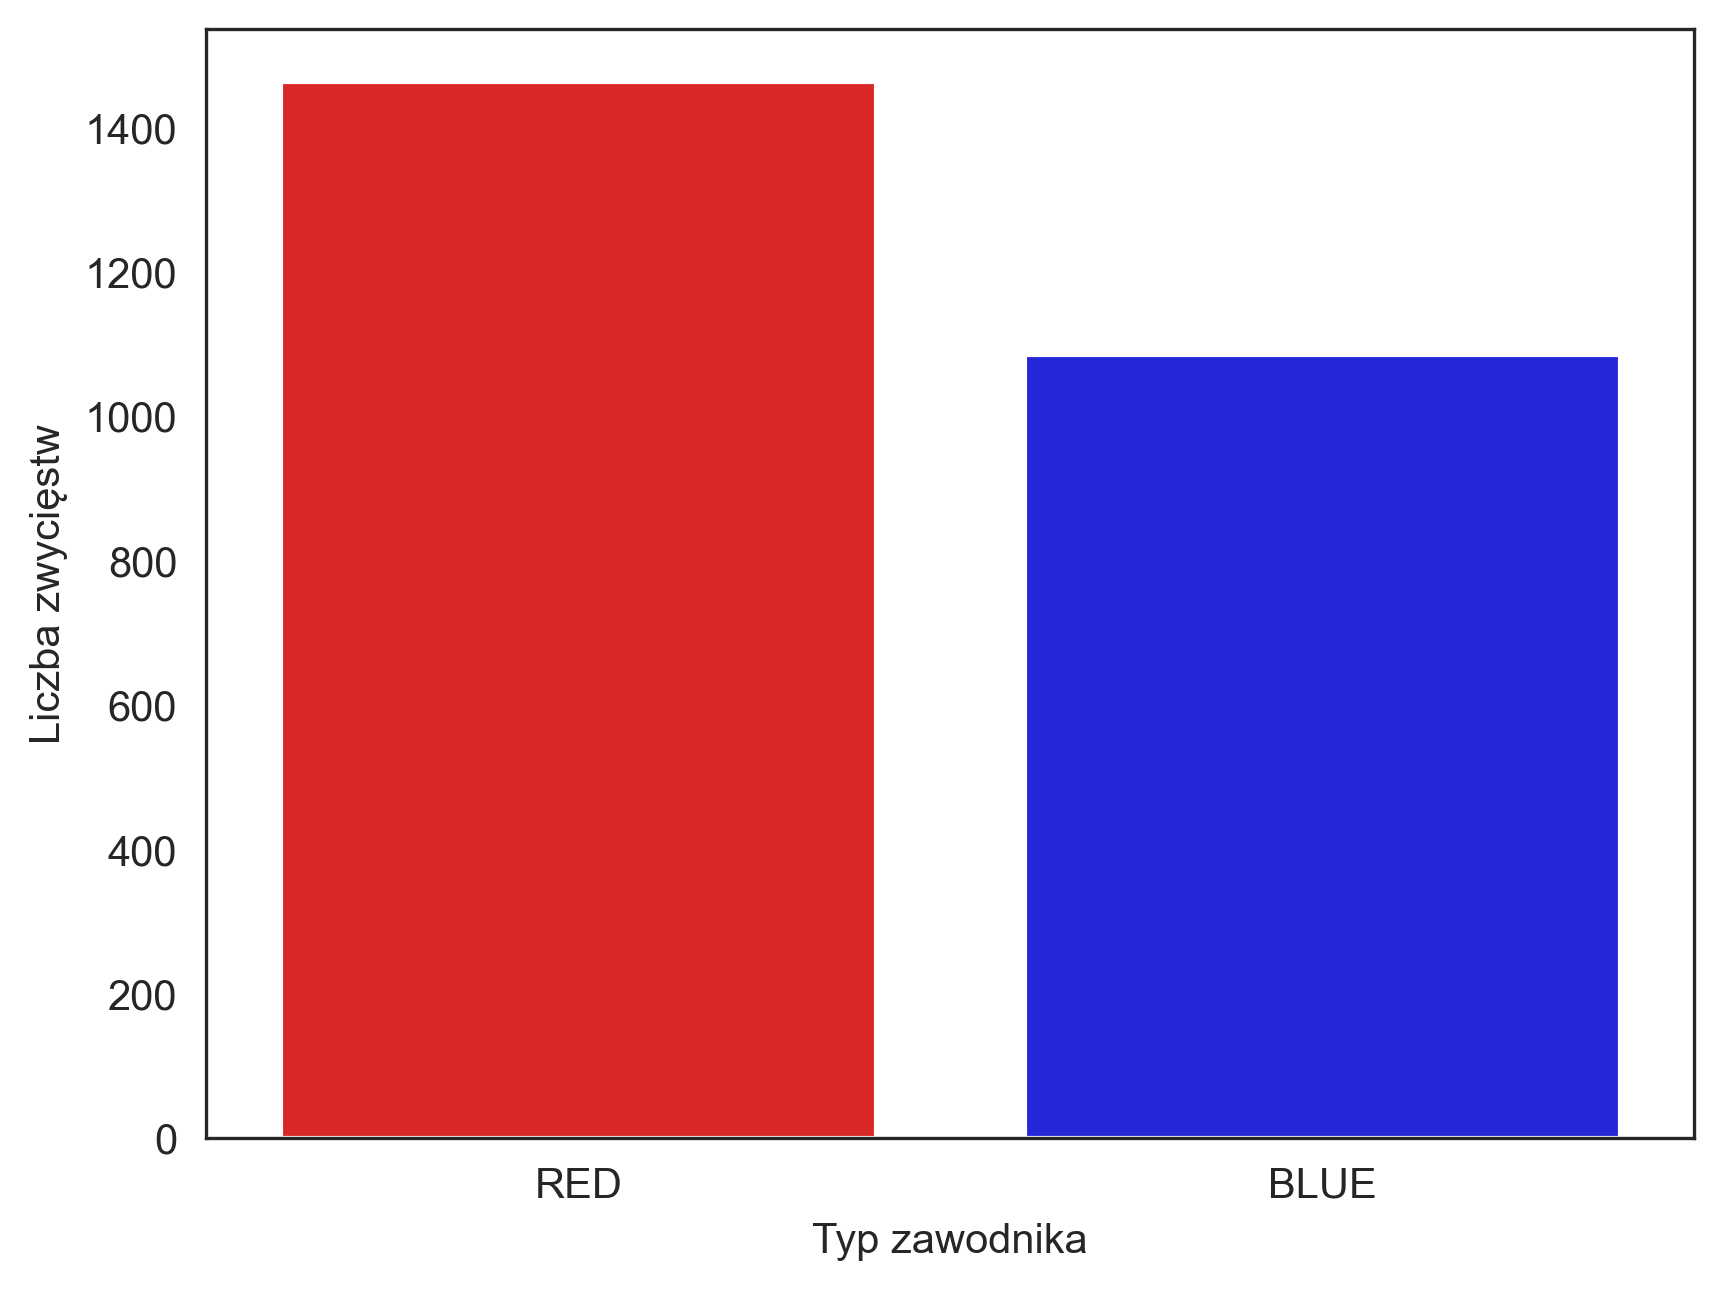

In [137]:
sns.set_style("white")
cplot = sns.countplot(data = df_full, x = 'WINNER', palette = ['red','blue'], saturation = 0.7)
cplot.set(ylabel = 'Liczba zwycięstw', xlabel = 'Typ zawodnika')

In [89]:
df_full.groupby(by=['WINNER']).count()

,FIGHT_URL,WEIGHT_CLASS,FINISH_METHOD,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS,GENDER
WINNER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BLUE,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
RED,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463


In [92]:
len(df_full.loc[df_full.WINNER == 'RED'])/(len(df_full))

0.5741758241758241

In [17]:
cplot2 = sns.countplot(data = df_full, x = 'FINISH_METHOD', saturation = 0.8)
cplot2.set_xticks(ticks=[0:3],labels = ['Decyzja niejednogłośna','Decyzja większościowa','Decyzja jednogłośna', 'Nokaut/Poddanie'])

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3839658731.py, line 2)

In [22]:
dict_body_focus = {1:'Głowa',2:'Ciało',3:'Nogi',4:'Brak'}
dict_position_focus = {1:'Dystans',2:'Zwarcie',3:'Parter'}

## Statystyki opisowe

In [14]:
pd.DataFrame(df_full.iloc[:,5:49].skew(),columns= ['skew']).transpose()

,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS
skew,0.373971,0.157512,0.151586,2.508278,2.756861,0.235705,0.250369,2.825252,3.517537,4.593842,3.817028,1.74458,2.019461,1.139942,1.082279,2.396247,2.65909,1.888582,-0.526846,1.65567,-0.579692,2.118358,1.252915,1.848946,1.525672,2.334809,1.790363,2.413502,1.642663,2.000337,-1.043642,1.439077,-1.281467,2.874643,2.306991,2.83763,2.129978,3.00951,1.760707,3.698376,2.320618,0.306872,0.190542,2.120034


In [15]:
stats = pd.DataFrame(df_full.iloc[:,5:49].skew(),columns= ['skew']).transpose()
stats.loc['kurt'] = df_full.iloc[:,5:49].kurtosis()

In [16]:
stats

,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS
skew,0.373971,0.157512,0.151586,2.508278,2.756861,0.235705,0.250369,2.825252,3.517537,4.593842,3.817028,1.744580,2.019461,1.139942,1.082279,2.396247,2.65909,1.888582,-0.526846,1.655670,-0.579692,2.118358,1.252915,1.848946,1.525672,2.334809,1.790363,2.413502,1.642663,2.000337,-1.043642,1.439077,-1.281467,2.874643,2.306991,2.83763,2.129978,3.009510,1.760707,3.698376,2.320618,0.306872,0.190542,2.120034
kurt,0.193371,0.020661,0.143833,7.296381,9.201210,1.016028,1.236198,10.149075,16.971851,31.503636,17.401821,3.122974,4.656852,2.478970,1.645872,7.579548,9.42339,6.397229,0.082512,4.339617,0.173963,8.288398,3.203299,5.302331,4.503133,7.962466,4.333956,8.735010,3.561924,9.451328,0.197934,2.588190,1.008099,11.230480,7.010635,12.81396,6.143761,12.042266,2.361796,18.769586,5.202897,-1.866558,-1.919872,2.685499


In [ ]:
stats.transpose()


In [138]:
stats = df_full.iloc[:,5:49].describe()

In [139]:
stats.loc['skew'] = df_full.iloc[:,5:49].skew().tolist()
stats.loc['kurt'] = df_full.iloc[:,5:49].kurtosis().tolist()

In [140]:
df_full.head()

,FIGHT_URL,WEIGHT_CLASS,WINNER,FINISH_METHOD,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS,GENDER
1,http://ufcstats.com/fight-details/c483ac06b1e3...,Welterweight,RED,50,31,35,0.973684,1.027778,0,0,74,42,0,0,0,0,0,303,123,113,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,41.67,6,6.90,111,92.50,65,74.71,9,7.50,21,24.14,0,0.0,1,1.15,4,1,1,1,1
2,http://ufcstats.com/fight-details/90a83875e1d1...,Lightweight,RED,50,34,29,0.985915,1.044118,0,0,60,57,0,0,0,0,5,0,106,97,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7.77,7,7.22,84,81.55,81,83.51,19,18.45,16,16.49,0,0.0,0,0.00,1,4,1,1,1
3,http://ufcstats.com/fight-details/019b4d006800...,Welterweight,RED,100,34,33,1.000000,0.986111,0,0,90,58,1,0,0,0,193,0,20,18,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,0.00,4,57.14,1,10.00,6,85.71,2,20.00,0,0.00,7,70.0,1,14.29,1,4,3,1,1
4,http://ufcstats.com/fight-details/dd9cbf6d6284...,Women's Flyweight,RED,75,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,83,0,151,137,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,7.59,5,3.65,124,85.52,129,94.16,21,14.48,8,5.84,0,0.0,0,0.00,1,1,1,1,0
5,http://ufcstats.com/fight-details/5e9c027fb24e...,Middleweight,RED,75,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,14,106,71,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,35.85,8,11.27,100,94.34,67,94.37,6,5.66,4,5.63,0,0.0,0,0.00,4,1,1,1,1


In [141]:
stats

,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS
count,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000
mean,32.516091,1.000953,1.000026,0.226845,0.206044,48.117347,46.025903,0.332810,0.266091,0.132653,0.132261,138.713893,110.896782,63.397567,58.667582,1.122841,0.897174,28.868917,61.573422,26.472527,59.231236,9.758242,20.699627,8.976060,21.351177,7.062009,17.138191,7.150314,18.475742,35.411695,73.278721,33.859890,76.208379,4.917582,11.056499,4.874411,11.616664,5.359890,15.076205,3.864600,11.233108,2.267661,2.361068,1.271978
std,4.038407,0.044817,0.035604,0.510157,0.492116,14.867480,15.101571,0.736554,0.668898,0.436445,0.417721,181.421160,152.916977,47.706546,44.635810,1.764786,1.552517,26.328839,22.229581,24.150808,22.970049,10.264027,15.111702,9.126893,16.260096,8.613277,17.806430,8.769469,18.494560,34.553709,26.397409,31.259285,24.780882,7.254981,14.712577,6.980983,14.816662,9.341091,22.817777,7.714484,19.810336,1.449782,1.457394,0.656734
min,20.000000,0.852941,0.887324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,0.971429,0.972973,0.000000,0.000000,39.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,25.000000,24.000000,0.000000,0.000000,9.000000,47.920000,8.000000,45.450000,2.000000,10.260000,2.000000,10.517500,1.000000,4.000000,1.000000,4.742500,9.000000,58.412500,10.000000,64.485000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,32.000000,1.000000,1.000000,0.000000,0.000000,48.000000,46.000000,0.000000,0.000000,0.000000,0.000000,60.000000,44.000000,57.000000,51.000000,0.000000,0.000000,22.000000,63.325000,20.000000,61.540000,7.000000,18.750000,6.000000,19.265000,4.000000,12.500000,4.000000,13.640000,26.000000,81.625000,25.000000,84.000000,2.000000,6.115000,2.000000,6.320000,1.000000,3.345000,1.000000,0.950000,1.000000,1.000000,1.000000
75%,35.000000,1.028986,1.027027,0.000000,0.000000,57.000000,55.000000,0.000000,0.000000,0.000000,0.000000,206.000000,162.250000,90.000000,84.000000,2.000000,1.000000,41.000000,78.092500,38.000000,75.000000,14.000000,28.570000,13.000000,28.927500,10.000000,24.612500,10.000000,26.670000,51.250000,94.830000,50.000000,95.450000,6.000000,15.842500,6.250000,16.725000,7.000000,21.430000,4.000000,13.330000,4.000000,4.000000,1.000000
max,47.000000,1.149254,1.136986,4.000000,4.000000,100.000000,100.000000,7.000000,7.000000,6.000000,4

In [146]:
len(df_full.iloc[:,4:46].columns)

42

In [147]:
corr = df_full.iloc[:,4:46].corr(method="spearman")
#sns.heatmap(corr, cmap="RdYlGn")
stack_corr = corr.unstack().reset_index(name='Wsp. korelacji Spearmana')
stack_corr.rename(columns={'level_0': 'Pierwsza zmienna', 'level_1': 'Druga zmienna'}, inplace=True)
stack_corr

,Pierwsza zmienna,Druga zmienna,Wsp. korelacji Spearmana
0,RED_AGE,RED_AGE,1.000000
1,RED_AGE,BLUE_AGE,0.211208
2,RED_AGE,REACH_DIFF_PERC,-0.067857
3,RED_AGE,HEIGHT_DIFF_PERC,-0.089481
4,RED_AGE,RED_KD,-0.075145
...,...,...,...
1759,BLUE_LANDED_PERC_GROUND,BLUE_LANDED_PERC_CLINCH,0.061493
1760,BLUE_LANDED_PERC_GROUND,RED_GROUND_SUCCESSFUL,0.014742
1761,BLUE_LANDED_PERC_GROUND,RED_LANDED_PERC_GROUND,0.037523
1762,BLUE_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,0.960674


In [148]:
print(len(stack_corr.loc[(stack_corr['Wsp. korelacji Spearmana']<0.99) & (stack_corr['Wsp. korelacji Spearmana']>=0.6)]),len(stack_corr.loc[(stack_corr['Wsp. korelacji Spearmana']<0.99) & (stack_corr['Wsp. korelacji Spearmana']>=0.7)]))

64 38


In [153]:
stack_corr.loc[(stack_corr['Wsp. korelacji Spearmana']<0.99) & (stack_corr['Wsp. korelacji Spearmana']>=0.7
                                                               )].sort_values(by='Wsp. korelacji Spearmana')

,Pierwsza zmienna,Druga zmienna,Wsp. korelacji Spearmana
1246,BLUE_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,0.702683
1205,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,0.702683
1280,RED_DISTANCE_SUCCESSFUL,BLUE_HEAD_SUCCESSFUL,0.703787
870,BLUE_HEAD_SUCCESSFUL,RED_DISTANCE_SUCCESSFUL,0.703787
610,RED_TOTAL_STRIKE_SUCCESSFUL,RED_BODY_SUCCESSFUL,0.717819
938,RED_BODY_SUCCESSFUL,RED_TOTAL_STRIKE_SUCCESSFUL,0.717819
654,BLUE_TOTAL_STRIKE_SUCCESSFUL,BLUE_BODY_SUCCESSFUL,0.728126
1023,BLUE_BODY_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,0.728126
1160,RED_LANDED_PERC_LEG,RED_LEG_SUCCESSFUL,0.733323
1119,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,0.733323


df_full.drop(['RED_TOTAL_STRIKE_SUCCESSFUL',
              'BLUE_TOTAL_STRIKE_SUCCESSFUL',
              'RED_LANDED_PERC_GROUND',
              'BLUE_LANDED_PERC_GROUND',
              'RED_LANDED_PERC_CLINCH',
              'BLUE_LANDED_PERC_CLINCH',
              'RED_LANDED_PERC_LEG',
              'BLUE_LANDED_PERC_LEG'
             ], axis = 1,inplace = True)

In [43]:
df_full.head()

,FIGHT_URL,WEIGHT_CLASS,WINNER,FINISH_METHOD,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,BLUE_LEG_SUCCESSFUL,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,BLUE_CLINCH_SUCCESSFUL,RED_GROUND_SUCCESSFUL,BLUE_GROUND_SUCCESSFUL,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS
1,http://ufcstats.com/fight-details/c483ac06b1e3...,Welterweight Title,RED,50,31,35,0.973684,1.027778,0,0,74,42,0,0,0,0,0,303,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,6,111,92.50,65,74.71,9,21,0,1,4,1,1,1
2,http://ufcstats.com/fight-details/90a83875e1d1...,Lightweight,RED,50,34,29,0.985915,1.044118,0,0,60,57,0,0,0,0,5,0,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7,84,81.55,81,83.51,19,16,0,0,1,4,1,1
3,http://ufcstats.com/fight-details/019b4d006800...,Welterweight,RED,100,34,33,1.000000,0.986111,0,0,90,58,1,0,0,0,193,0,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,4,1,10.00,6,85.71,2,0,7,1,1,4,3,1
4,http://ufcstats.com/fight-details/dd9cbf6d6284...,Women's Flyweight,RED,75,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,83,0,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,5,124,85.52,129,94.16,21,8,0,0,1,1,1,1
5,http://ufcstats.com/fight-details/5e9c027fb24e...,Middleweight,RED,75,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,14,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,8,100,94.34,67,94.37,6,4,0,0,4,1,1,1


In [18]:
df_full['WEIGHT_CLASS'].loc[df_full['RED_BODY_PART_FOCUS']==1]

2               Lightweight
3              Welterweight
4         Women's Flyweight
6             Featherweight
10            Featherweight
               ...         
2665            Heavyweight
2666           Middleweight
2668            Lightweight
2670    Women's Strawweight
2672    Women's Strawweight
Name: WEIGHT_CLASS, Length: 1430, dtype: object

In [19]:
df_full['WEIGHT_CLASS'].loc[df_full['RED_BODY_PART_FOCUS']==1]

2               Lightweight
3              Welterweight
4         Women's Flyweight
6             Featherweight
10            Featherweight
               ...         
2665            Heavyweight
2666           Middleweight
2668            Lightweight
2670    Women's Strawweight
2672    Women's Strawweight
Name: WEIGHT_CLASS, Length: 1430, dtype: object

In [46]:
df_full['WEIGHT_CLASS'].unique()

array(['Welterweight Title', 'Lightweight', 'Welterweight',
       "Women's Flyweight", 'Middleweight', 'Featherweight', 'Flyweight',
       'Bantamweight', 'Heavyweight', 'Light Heavyweight',
       'Heavyweight Title', "Women's Flyweight Title",
       "Women's Strawweight", "Women's Bantamweight", 'Lightweight Title',
       'Featherweight Title', 'Light Heavyweight Title',
       "Women's Featherweight", 'Middleweight Title',
       "Women's Strawweight Title", 'Bantamweight Title',
       "Women's Bantamweight Title", 'Flyweight Title',
       "Women's Featherweight Title"], dtype=object)

In [34]:
rbpart_dict = {}
for x in df_full['RED_BODY_PART_FOCUS'].unique():
    list_df = df_full.WINNER.loc[df_full['RED_BODY_PART_FOCUS']==x]
    rbpart_dict.update({x:list_df})

In [40]:
scipy.stats.kruskal(list(rbpart_dict[1]),list(rbpart_dict[2]),list(rbpart_dict[3]),list(rbpart_dict[4]))

KruskalResult(statistic=112.70087736302007, pvalue=2.8775483406399887e-24)

In [47]:
bbpart_dict = {}
for x in df_full['BLUE_BODY_PART_FOCUS'].unique():
    list_df = df_full.WINNER.loc[df_full['BLUE_BODY_PART_FOCUS']==x]
    bbpart_dict.update({x:list_df})
scipy.stats.kruskal(list(bbpart_dict[1]),list(bbpart_dict[2]),list(bbpart_dict[3]),list(bbpart_dict[4]))

KruskalResult(statistic=113.15567663385782, pvalue=2.296802509858779e-24)

In [49]:
df_full['RED_POSITION_FOCUS'].unique()

array([1, 3, 2])

In [50]:
rpfoc_dict = {}
for x in df_full['RED_POSITION_FOCUS'].unique():
    list_df = df_full.WINNER.loc[df_full['RED_POSITION_FOCUS']==x]
    rpfoc_dict.update({x:list_df})
scipy.stats.kruskal(list(rpfoc_dict[1]),list(rpfoc_dict[2]),list(rpfoc_dict[3]))

KruskalResult(statistic=132.01932916152217, pvalue=2.1496458681105243e-29)

In [51]:
bpfoc_dict = {}
for x in df_full['BLUE_POSITION_FOCUS'].unique():
    list_df = df_full.WINNER.loc[df_full['BLUE_POSITION_FOCUS']==x]
    bpfoc_dict.update({x:list_df})
scipy.stats.kruskal(list(bpfoc_dict[1]),list(bpfoc_dict[2]),list(bpfoc_dict[3]))

KruskalResult(statistic=95.54769448277294, pvalue=1.7868239450541327e-21)

In [ ]:
scipy.stats.kruskal(list(rbpart_dict[1]),list(rbpart_dict[2]),list(rbpart_dict[3]),list(rbpart_dict[4]))

In [99]:
le = LabelEncoder()
ids = le.fit_transform(df_full.loc[:,'WEIGHT_CLASS'])
df_full['WEIGHT_CLASS_encoded'] = le.fit_transform(df_full.loc[:,'WEIGHT_CLASS'])

In [100]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [101]:
all([mapping[x] for x in le.inverse_transform(ids)] == ids)

True

In [102]:
mapping

{'Bantamweight': 0,
 'Featherweight': 1,
 'Flyweight': 2,
 'Heavyweight': 3,
 'Light Heavyweight': 4,
 'Lightweight': 5,
 'Middleweight': 6,
 'Welterweight': 7,
 "Women's Bantamweight": 8,
 "Women's Featherweight": 9,
 "Women's Flyweight": 10,
 "Women's Strawweight": 11}

In [105]:
#df_full['GENDER'] = np.where(df_full['WEIGHT_CLASS_encoded'] > 15, 0,1)

In [41]:
weight_dict = {}
for x in df_full['WEIGHT_CLASS_encoded'].unique():
    list_df = df_full.WINNER.loc[df_full['WEIGHT_CLASS_encoded']==x]
    weight_dict.update({x:list_df})
scipy.stats.kruskal(list(weight_dict[1]),list(weight_dict[2]),list(weight_dict[3]),
                   list(weight_dict[4]),list(weight_dict[5]),list(weight_dict[6]),
                   list(weight_dict[7]),list(weight_dict[8]),list(weight_dict[9]),
                   list(weight_dict[10]),list(weight_dict[11]),list(weight_dict[0]))

KruskalResult(statistic=9.935039538443535, pvalue=0.5362397213017505)

In [27]:
chisqt = pd.crosstab(df_full.WINNER, df_full.RED_BODY_PART_FOCUS, margins=True)
print(chisqt)

RED_BODY_PART_FOCUS     1   2   3     4   All
WINNER                                       
BLUE                  486  33  56   510  1085
RED                   929  15  17   502  1463
All                  1415  48  73  1012  2548


In [28]:
value = np.array([chisqt.iloc[0][0:4].values,
                  chisqt.iloc[1][0:4].values])
print(value)

[[486  33  56 510]
 [929  15  17 502]]


In [33]:
print(chi2_contingency(value)[0:3])

(112.74512584254887, 2.8151267832463557e-24, 3)


In [34]:
chisqt = pd.crosstab(df_full.WINNER, df_full.BLUE_BODY_PART_FOCUS, margins=True)
print(chisqt)

BLUE_BODY_PART_FOCUS     1   2   3     4   All
WINNER                                        
BLUE                   686   6  15   378  1085
RED                    642  49  67   705  1463
All                   1328  55  82  1083  2548


In [35]:
value = np.array([chisqt.iloc[0][0:4].values,
                  chisqt.iloc[1][0:4].values])
print(value)

[[686   6  15 378]
 [642  49  67 705]]


In [36]:
print(chi2_contingency(value))

Chi2ContingencyResult(statistic=113.20010367611538, pvalue=2.246778275504871e-24, dof=3, expected_freq=array([[565.49450549,  23.42032967,  34.91758242, 461.16758242],
       [762.50549451,  31.57967033,  47.08241758, 621.83241758]]))


In [37]:
chisqt = pd.crosstab(df_full.WINNER, df_full.RED_POSITION_FOCUS, margins=True)
print(chisqt)

RED_POSITION_FOCUS     1   2    3   All
WINNER                                 
BLUE                1010  40   35  1085
RED                 1142  59  262  1463
All                 2152  99  297  2548


In [38]:
value = np.array([chisqt.iloc[0][0:3].values,
                  chisqt.iloc[1][0:3].values])
print(value)

[[1010   40   35]
 [1142   59  262]]


In [44]:
print(chi2_contingency(value))

Chi2ContingencyResult(statistic=132.07116242777929, pvalue=2.0946500166724442e-29, dof=2, expected_freq=array([[ 916.37362637,   42.15659341,  126.46978022],
       [1235.62637363,   56.84340659,  170.53021978]]))


In [45]:
chisqt = pd.crosstab(df_full.WINNER, df_full.BLUE_POSITION_FOCUS, margins=True)
print(chisqt)

BLUE_POSITION_FOCUS     1   2    3   All
WINNER                                  
BLUE                  901  35  149  1085
RED                  1357  58   48  1463
All                  2258  93  197  2548


In [46]:
value = np.array([chisqt.iloc[0][0:3].values,
                  chisqt.iloc[1][0:3].values])
print(value)

[[ 901   35  149]
 [1357   58   48]]


In [47]:
print(chi2_contingency(value))

Chi2ContingencyResult(statistic=95.58520830078581, pvalue=1.753621016514259e-21, dof=2, expected_freq=array([[ 961.51098901,   39.60164835,   83.88736264],
       [1296.48901099,   53.39835165,  113.11263736]]))


In [48]:
df_full['WEIGHT_CLASS'] = np.where(df_full['WEIGHT_CLASS'] == "Women's Featherweight","Women's Feather_Bantamweight",
                                 np.where(df_full['WEIGHT_CLASS'] == "Women's Bantamweight","Women's Feather_Bantamweight",df_full['WEIGHT_CLASS']))

In [49]:
df_chi2_m = df_full.loc[df_full['GENDER']==1][['WEIGHT_CLASS','WINNER']]
df_chi2_w = df_full.loc[df_full['GENDER']==0][['WEIGHT_CLASS','WINNER']]
#df_grouped_no_title = df_grouped.filter( regex = r"^((?!Title).)*$",axis = 0)
#df_grouped_title = df_grouped.filter( like ='Title',axis = 0)

In [50]:
chisqt = pd.crosstab(df_chi2_w.WINNER, df_chi2_w.WEIGHT_CLASS, margins=True)
pd.DataFrame(chisqt).head()

WEIGHT_CLASS,Women's Feather_Bantamweight,Women's Flyweight,Women's Strawweight,All
WINNER,,,,
BLUE,49,74,70,193
RED,64,107,87,258
All,113,181,157,451


In [51]:
value = np.array([chisqt.iloc[0][0:3].values,
                  chisqt.iloc[1][0:3].values])
print(value)

[[ 49  74  70]
 [ 64 107  87]]


In [52]:
print(chi2_contingency(value))

Chi2ContingencyResult(statistic=0.4906092309100699, pvalue=0.7824661506529089, dof=2, expected_freq=array([[ 48.35698448,  77.45676275,  67.18625277],
       [ 64.64301552, 103.54323725,  89.81374723]]))


In [53]:
chisqt = pd.crosstab(df_chi2_m.WINNER, df_chi2_m.WEIGHT_CLASS, margins=True)
pd.DataFrame(chisqt).head()

WEIGHT_CLASS,Bantamweight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,All
WINNER,,,,,,,,,
BLUE,123,114,57,85,95,141,130,147,892
RED,172,188,74,117,102,204,147,201,1205
All,295,302,131,202,197,345,277,348,2097


In [54]:
value = np.array([chisqt.iloc[0][0:3].values,
                  chisqt.iloc[1][0:3].values])
print(value)

[[123 114  57]
 [172 188  74]]


In [55]:
print(chi2_contingency(value))

Chi2ContingencyResult(statistic=1.6141585414573725, pvalue=0.44615927551355594, dof=2, expected_freq=array([[119.13461538, 121.96153846,  52.90384615],
       [175.86538462, 180.03846154,  78.09615385]]))


In [56]:
chisqt = pd.crosstab(df_full.WINNER, df_full.GENDER, margins=True)
pd.DataFrame(chisqt).head()

GENDER,0,1,All
WINNER,,,
BLUE,193,892,1085
RED,258,1205,1463
All,451,2097,2548


In [57]:
value = np.array([chisqt.iloc[0][0:2].values,
                  chisqt.iloc[1][0:2].values])
print(value)

[[ 193  892]
 [ 258 1205]]


In [58]:
print(chi2_contingency(value))

Chi2ContingencyResult(statistic=0.0022641977551029952, pvalue=0.9620481128603535, dof=1, expected_freq=array([[ 192.0467033,  892.9532967],
       [ 258.9532967, 1204.0467033]]))


## Przygotowanie zbioru do modelowania

In [13]:
df_full['WINNER'] = np.where(df_full['WINNER'] == 'RED', 1,0)

In [14]:
df_full.head()

,FIGHT_URL,WEIGHT_CLASS,WINNER,FINISH_METHOD,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS,GENDER
1,http://ufcstats.com/fight-details/c483ac06b1e3...,Welterweight,1,50,31,35,0.973684,1.027778,0,0,74,42,0,0,0,0,0,303,123,113,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,41.67,6,6.90,111,92.50,65,74.71,9,7.50,21,24.14,0,0.0,1,1.15,4,1,1,1,1
2,http://ufcstats.com/fight-details/90a83875e1d1...,Lightweight,1,50,34,29,0.985915,1.044118,0,0,60,57,0,0,0,0,5,0,106,97,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7.77,7,7.22,84,81.55,81,83.51,19,18.45,16,16.49,0,0.0,0,0.00,1,4,1,1,1
3,http://ufcstats.com/fight-details/019b4d006800...,Welterweight,1,100,34,33,1.000000,0.986111,0,0,90,58,1,0,0,0,193,0,20,18,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,0.00,4,57.14,1,10.00,6,85.71,2,20.00,0,0.00,7,70.0,1,14.29,1,4,3,1,1
4,http://ufcstats.com/fight-details/dd9cbf6d6284...,Women's Flyweight,1,75,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,83,0,151,137,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,7.59,5,3.65,124,85.52,129,94.16,21,14.48,8,5.84,0,0.0,0,0.00,1,1,1,1,0
5,http://ufcstats.com/fight-details/5e9c027fb24e...,Middleweight,1,75,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,14,106,71,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,35.85,8,11.27,100,94.34,67,94.37,6,5.66,4,5.63,0,0.0,0,0.00,4,1,1,1,1


In [15]:
df_prep = df_full.drop(df_full.iloc[:,[0,1,3]],axis = 1)

In [16]:
df_prep.head()

,WINNER,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS,GENDER
1,1,31,35,0.973684,1.027778,0,0,74,42,0,0,0,0,0,303,123,113,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,41.67,6,6.90,111,92.50,65,74.71,9,7.50,21,24.14,0,0.0,1,1.15,4,1,1,1,1
2,1,34,29,0.985915,1.044118,0,0,60,57,0,0,0,0,5,0,106,97,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7.77,7,7.22,84,81.55,81,83.51,19,18.45,16,16.49,0,0.0,0,0.00,1,4,1,1,1
3,1,34,33,1.000000,0.986111,0,0,90,58,1,0,0,0,193,0,20,18,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,0.00,4,57.14,1,10.00,6,85.71,2,20.00,0,0.00,7,70.0,1,14.29,1,4,3,1,1
4,1,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,83,0,151,137,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,7.59,5,3.65,124,85.52,129,94.16,21,14.48,8,5.84,0,0.0,0,0.00,1,1,1,1,0
5,1,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,14,106,71,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,35.85,8,11.27,100,94.34,67,94.37,6,5.66,4,5.63,0,0.0,0,0.00,4,1,1,1,1


In [17]:
features = df_prep.copy()

In [18]:
features.head()

,WINNER,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS,GENDER
1,1,31,35,0.973684,1.027778,0,0,74,42,0,0,0,0,0,303,123,113,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,41.67,6,6.90,111,92.50,65,74.71,9,7.50,21,24.14,0,0.0,1,1.15,4,1,1,1,1
2,1,34,29,0.985915,1.044118,0,0,60,57,0,0,0,0,5,0,106,97,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7.77,7,7.22,84,81.55,81,83.51,19,18.45,16,16.49,0,0.0,0,0.00,1,4,1,1,1
3,1,34,33,1.000000,0.986111,0,0,90,58,1,0,0,0,193,0,20,18,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,0.00,4,57.14,1,10.00,6,85.71,2,20.00,0,0.00,7,70.0,1,14.29,1,4,3,1,1
4,1,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,83,0,151,137,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,7.59,5,3.65,124,85.52,129,94.16,21,14.48,8,5.84,0,0.0,0,0.00,1,1,1,1,0
5,1,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,14,106,71,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,35.85,8,11.27,100,94.34,67,94.37,6,5.66,4,5.63,0,0.0,0,0.00,4,1,1,1,1


In [19]:
y_train = pd.DataFrame(features.loc[:,'WINNER'])
X = features.drop('WINNER',axis = 1)

In [20]:
X.head()

,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS,GENDER
1,31,35,0.973684,1.027778,0,0,74,42,0,0,0,0,0,303,123,113,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,41.67,6,6.90,111,92.50,65,74.71,9,7.50,21,24.14,0,0.0,1,1.15,4,1,1,1,1
2,34,29,0.985915,1.044118,0,0,60,57,0,0,0,0,5,0,106,97,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7.77,7,7.22,84,81.55,81,83.51,19,18.45,16,16.49,0,0.0,0,0.00,1,4,1,1,1
3,34,33,1.000000,0.986111,0,0,90,58,1,0,0,0,193,0,20,18,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,0.00,4,57.14,1,10.00,6,85.71,2,20.00,0,0.00,7,70.0,1,14.29,1,4,3,1,1
4,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,83,0,151,137,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,7.59,5,3.65,124,85.52,129,94.16,21,14.48,8,5.84,0,0.0,0,0.00,1,1,1,1,0
5,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,14,106,71,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,35.85,8,11.27,100,94.34,67,94.37,6,5.66,4,5.63,0,0.0,0,0.00,4,1,1,1,1


In [21]:
category_features = ['RED_BODY_PART_FOCUS','BLUE_BODY_PART_FOCUS', 'RED_POSITION_FOCUS', 
                     'BLUE_POSITION_FOCUS']
#scaler_features = ['RED_AGE', 'BLUE_AGE', 'REACH_DIFF_PERC', 'HEIGHT_DIFF_PERC', 'RED_KD', 
#                   'BLUE_KD', 'RED_SIG_STRIKE_PERC', 'BLUE_SIG_STRIKE_PERC', 'RED_SUB_ATT', 'BLUE_SUB_ATT', 
#                   'RED_REV', 'BLUE_REV', 'RED_CTRL_SEC', 'BLUE_CTRL_SEC', 'RED_TD_SUCCESSFUL', 'BLUE_TD_SUCCESSFUL', 
#                   'RED_HEAD_SUCCESSFUL', 'RED_LANDED_PERC_HEAD', 'BLUE_HEAD_SUCCESSFUL', 'BLUE_LANDED_PERC_HEAD', 
#                   'RED_BODY_SUCCESSFUL', 'RED_LANDED_PERC_BODY', 'BLUE_BODY_SUCCESSFUL', 'BLUE_LANDED_PERC_BODY', 
#                   'RED_LEG_SUCCESSFUL', 'BLUE_LEG_SUCCESSFUL', 'RED_DISTANCE_SUCCESSFUL', 'RED_LANDED_PERC_DISTANCE',
#                   'BLUE_DISTANCE_SUCCESSFUL', 'BLUE_LANDED_PERC_DISTANCE', 'RED_CLINCH_SUCCESSFUL', 
#                   'BLUE_CLINCH_SUCCESSFUL', 'RED_GROUND_SUCCESSFUL', 'BLUE_GROUND_SUCCESSFUL']
X.columns

Index(['RED_AGE', 'BLUE_AGE', 'REACH_DIFF_PERC', 'HEIGHT_DIFF_PERC', 'RED_KD', 'BLUE_KD', 'RED_SIG_STRIKE_PERC', 'BLUE_SIG_STRIKE_PERC', 'RED_SUB_ATT', 'BLUE_SUB_ATT', 'RED_REV', 'BLUE_REV', 'RED_CTRL_SEC', 'BLUE_CTRL_SEC', 'RED_TOTAL_STRIKE_SUCCESSFUL', 'BLUE_TOTAL_STRIKE_SUCCESSFUL', 'RED_TD_SUCCESSFUL', 'BLUE_TD_SUCCESSFUL', 'RED_HEAD_SUCCESSFUL', 'RED_LANDED_PERC_HEAD', 'BLUE_HEAD_SUCCESSFUL', 'BLUE_LANDED_PERC_HEAD', 'RED_BODY_SUCCESSFUL', 'RED_LANDED_PERC_BODY', 'BLUE_BODY_SUCCESSFUL', 'BLUE_LANDED_PERC_BODY', 'RED_LEG_SUCCESSFUL', 'RED_LANDED_PERC_LEG', 'BLUE_LEG_SUCCESSFUL', 'BLUE_LANDED_PERC_LEG', 'RED_DISTANCE_SUCCESSFUL', 'RED_LANDED_PERC_DISTANCE', 'BLUE_DISTANCE_SUCCESSFUL', 'BLUE_LANDED_PERC_DISTANCE', 'RED_CLINCH_SUCCESSFUL', 'RED_LANDED_PERC_CLINCH', 'BLUE_CLINCH_SUCCESSFUL', 'BLUE_LANDED_PERC_CLINCH', 'RED_GROUND_SUCCESSFUL', 'RED_LANDED_PERC_GROUND', 'BLUE_GROUND_SUCCESSFUL', 'BLUE_LANDED_PERC_GROUND', 'RED_BODY_PART_FOCUS', 'BLUE_BODY_PART_FOCUS',
       'RED_POSITIO

In [22]:
X.head()

,RED_AGE,BLUE_AGE,REACH_DIFF_PERC,HEIGHT_DIFF_PERC,RED_KD,BLUE_KD,RED_SIG_STRIKE_PERC,BLUE_SIG_STRIKE_PERC,RED_SUB_ATT,BLUE_SUB_ATT,RED_REV,BLUE_REV,RED_CTRL_SEC,BLUE_CTRL_SEC,RED_TOTAL_STRIKE_SUCCESSFUL,BLUE_TOTAL_STRIKE_SUCCESSFUL,RED_TD_SUCCESSFUL,BLUE_TD_SUCCESSFUL,RED_HEAD_SUCCESSFUL,RED_LANDED_PERC_HEAD,BLUE_HEAD_SUCCESSFUL,BLUE_LANDED_PERC_HEAD,RED_BODY_SUCCESSFUL,RED_LANDED_PERC_BODY,BLUE_BODY_SUCCESSFUL,BLUE_LANDED_PERC_BODY,RED_LEG_SUCCESSFUL,RED_LANDED_PERC_LEG,BLUE_LEG_SUCCESSFUL,BLUE_LANDED_PERC_LEG,RED_DISTANCE_SUCCESSFUL,RED_LANDED_PERC_DISTANCE,BLUE_DISTANCE_SUCCESSFUL,BLUE_LANDED_PERC_DISTANCE,RED_CLINCH_SUCCESSFUL,RED_LANDED_PERC_CLINCH,BLUE_CLINCH_SUCCESSFUL,BLUE_LANDED_PERC_CLINCH,RED_GROUND_SUCCESSFUL,RED_LANDED_PERC_GROUND,BLUE_GROUND_SUCCESSFUL,BLUE_LANDED_PERC_GROUND,RED_BODY_PART_FOCUS,BLUE_BODY_PART_FOCUS,RED_POSITION_FOCUS,BLUE_POSITION_FOCUS,GENDER
1,31,35,0.973684,1.027778,0,0,74,42,0,0,0,0,0,303,123,113,0,4,34,28.33,57,65.52,36,30.00,24,27.59,50,41.67,6,6.90,111,92.50,65,74.71,9,7.50,21,24.14,0,0.0,1,1.15,4,1,1,1,1
2,34,29,0.985915,1.044118,0,0,60,57,0,0,0,0,5,0,106,97,1,0,81,78.64,38,39.18,14,13.59,52,53.61,8,7.77,7,7.22,84,81.55,81,83.51,19,18.45,16,16.49,0,0.0,0,0.00,1,4,1,1,1
3,34,33,1.000000,0.986111,0,0,90,58,1,0,0,0,193,0,20,18,1,0,8,80.00,3,42.86,2,20.00,0,0.00,0,0.00,4,57.14,1,10.00,6,85.71,2,20.00,0,0.00,7,70.0,1,14.29,1,4,3,1,1
4,34,25,0.927536,0.969697,0,0,41,51,0,0,0,0,83,0,151,137,0,0,123,84.83,108,78.83,11,7.59,24,17.52,11,7.59,5,3.65,124,85.52,129,94.16,21,14.48,8,5.84,0,0.0,0,0.00,1,1,1,1,0
5,29,34,0.973684,0.972973,0,0,48,36,0,0,0,0,0,14,106,71,0,0,60,56.60,52,73.24,8,7.55,11,15.49,38,35.85,8,11.27,100,94.34,67,94.37,6,5.66,4,5.63,0,0.0,0,0.00,4,1,1,1,1


In [23]:
col_transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), category_features)
], remainder = 'passthrough')


X_trans = col_transformer.fit_transform(X)
X_train = pd.DataFrame(
    X_trans, 
    columns=col_transformer.get_feature_names_out()
)

In [24]:
X_train.head()

,onehot__RED_BODY_PART_FOCUS_2,onehot__RED_BODY_PART_FOCUS_3,onehot__RED_BODY_PART_FOCUS_4,onehot__BLUE_BODY_PART_FOCUS_2,onehot__BLUE_BODY_PART_FOCUS_3,onehot__BLUE_BODY_PART_FOCUS_4,onehot__RED_POSITION_FOCUS_2,onehot__RED_POSITION_FOCUS_3,onehot__BLUE_POSITION_FOCUS_2,onehot__BLUE_POSITION_FOCUS_3,remainder__RED_AGE,remainder__BLUE_AGE,remainder__REACH_DIFF_PERC,remainder__HEIGHT_DIFF_PERC,remainder__RED_KD,remainder__BLUE_KD,remainder__RED_SIG_STRIKE_PERC,remainder__BLUE_SIG_STRIKE_PERC,remainder__RED_SUB_ATT,remainder__BLUE_SUB_ATT,remainder__RED_REV,remainder__BLUE_REV,remainder__RED_CTRL_SEC,remainder__BLUE_CTRL_SEC,remainder__RED_TOTAL_STRIKE_SUCCESSFUL,remainder__BLUE_TOTAL_STRIKE_SUCCESSFUL,remainder__RED_TD_SUCCESSFUL,remainder__BLUE_TD_SUCCESSFUL,remainder__RED_HEAD_SUCCESSFUL,remainder__RED_LANDED_PERC_HEAD,remainder__BLUE_HEAD_SUCCESSFUL,remainder__BLUE_LANDED_PERC_HEAD,remainder__RED_BODY_SUCCESSFUL,remainder__RED_LANDED_PERC_BODY,remainder__BLUE_BODY_SUCCESSFUL,remainder__BLUE_LANDED_PERC_BODY,remainder__RED_LEG_SUCCESSFUL,remainder__RED_LANDED_PERC_LEG,remainder__BLUE_LEG_SUCCESSFUL,remainder__BLUE_LANDED_PERC_LEG,remainder__RED_DISTANCE_SUCCESSFUL,remainder__RED_LANDED_PERC_DISTANCE,remainder__BLUE_DISTANCE_SUCCESSFUL,remainder__BLUE_LANDED_PERC_DISTANCE,remainder__RED_CLINCH_SUCCESSFUL,remainder__RED_LANDED_PERC_CLINCH,remainder__BLUE_CLINCH_SUCCESSFUL,remainder__BLUE_LANDED_PERC_CLINCH,remainder__RED_GROUND_SUCCESSFUL,remainder__RED_LANDED_PERC_GROUND,remainder__BLUE_GROUND_SUCCESSFUL,remainder__BLUE_LANDED_PERC_GROUND,remainder__GENDER
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,35.0,0.973684,1.027778,0.0,0.0,74.0,42.0,0.0,0.0,0.0,0.0,0.0,303.0,123.0,113.0,0.0,4.0,34.0,28.33,57.0,65.52,36.0,30.00,24.0,27.59,50.0,41.67,6.0,6.90,111.0,92.50,65.0,74.71,9.0,7.50,21.0,24.14,0.0,0.0,1.0,1.15,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0,29.0,0.985915,1.044118,0.0,0.0,60.0,57.0,0.0,0.0,0.0,0.0,5.0,0.0,106.0,97.0,1.0,0.0,81.0,78.64,38.0,39.18,14.0,13.59,52.0,53.61,8.0,7.77,7.0,7.22,84.0,81.55,81.0,83.51,19.0,18.45,16.0,16.49,0.0,0.0,0.0,0.00,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,34.0,33.0,1.000000,0.986111,0.0,0.0,90.0,58.0,1.0,0.0,0.0,0.0,193.0,0.0,20.0,18.0,1.0,0.0,8.0,80.00,3.0,42.86,2.0,20.00,0.0,0.00,0.0,0.00,4.0,57.14,1.0,10.00,6.0,85.71,2.0,20.00,0.0,0.00,7.0,70.0,1.0,14.29,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,25.0,0.927536,0.969697,0.0,0.0,41.0,51.0,0.0,0.0,0.0,0.0,83.0,0.0,151.0,137.0,0.0,0.0,123.0,84.83,108.0,78.83,11.0,7.59,24.0,17.52,11.0,7.59,5.0,3.65,124.0,85.52,129.0,94.16,21.0,14.48,8.0,5.84,0.0,0.0,0.0,0.00,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,34.0,0.973684,0.972973,0.0,0.0,48.0,36.0,0.0,0.0,0.0,0.0,0.0,14.0,106.0,71.0,0.0,0.0,60.0,56.60,52.0,73.24,8.0,7.55,11.0,15.49,38.0,35.85,8.0,11.27,100.0,94.34,67.0,94.37,6.0,5.66,4.0,5.63,0.0,0.0,0.0,0.00,1.0


## Model regresji liniowej z eliminacją zmiennych

In [84]:
reg = LogisticRegression()
model = reg.fit(X_train, y_train)


#prediction = model.predict(X_test)
reg_score = reg.score(X_train, y_train)
print(reg_score)

0.8642072213500785


C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
threshold = 0.57
preds = np.where(model.predict_proba(X_train)[:,1] > threshold, 1, 0)

pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),
                   precision_score(y_train, preds), roc_auc_score(y_train, preds)], 
             index=["Dokładność", "Czułość", "Precyzja", "Miara ROC AUC"]).T.style.hide_index()

C:\Users\Marcel\AppData\Local\Temp\ipykernel_11616\3610649130.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),


Dokładność,Czułość,Precyzja,Miara ROC AUC
0.854788,0.857826,0.885674,0.854259


>5 0.726 (0.023)
>10 0.766 (0.022)
>15 0.830 (0.030)
>20 0.870 (0.013)
>25 0.871 (0.009)
>30 0.869 (0.012)
>35 0.868 (0.009)
>40 0.867 (0.009)
>45 0.861 (0.015)
>50 0.856 (0.014)


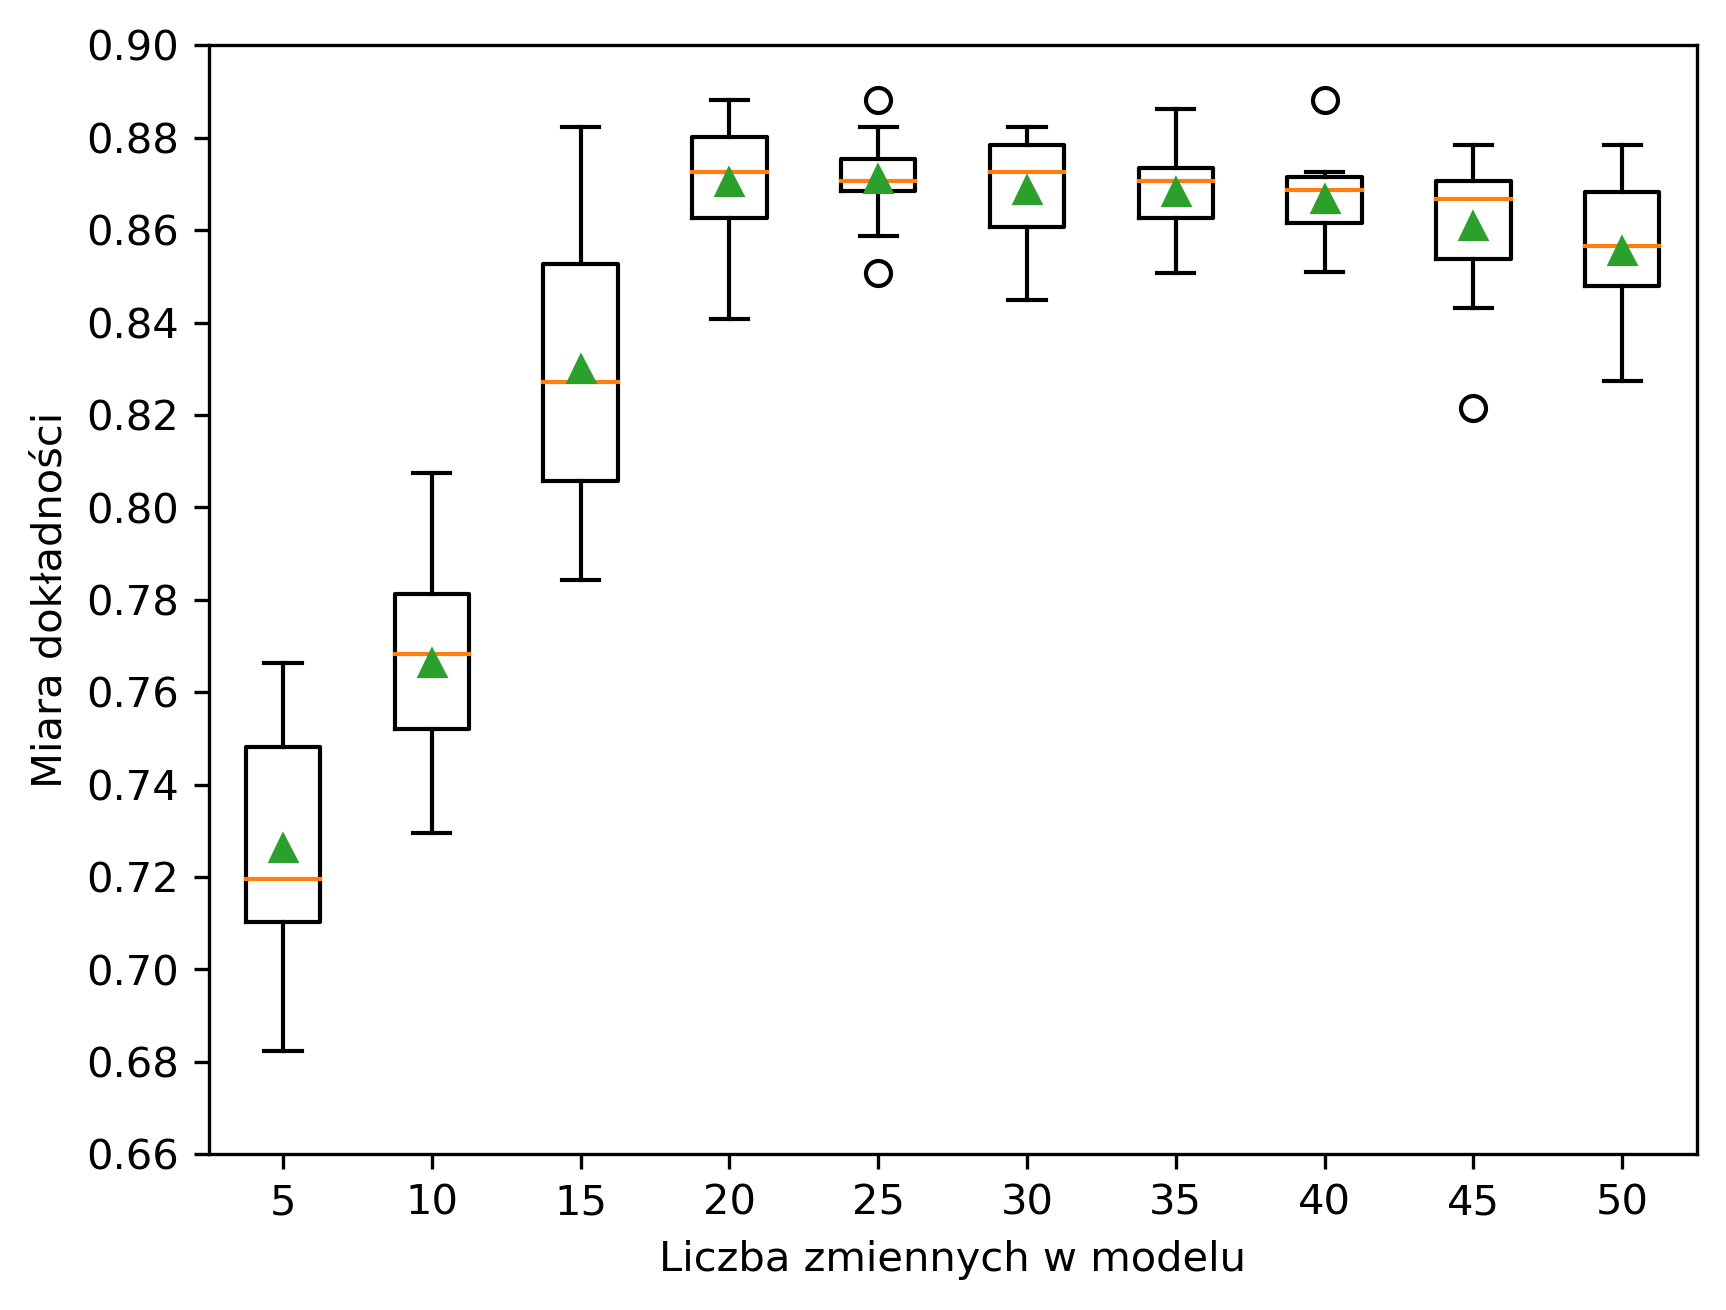

In [81]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(5, 55, 5):
        rfe = RFE(estimator=LogisticRegression(penalty='none',random_state=99), n_features_to_select=i)
        model = LogisticRegression()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# fit RFE
#rfe.fit(X_train, y_train)
# summarize all features
#for i in range(X.shape[1]):
#    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=99)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.yticks(np.arange(0.66,0.92, 0.02))
plt.ylabel('Miara dokładności')
plt.xlabel('Liczba zmiennych w modelu')
plt.show()

### Jakie kolumny wybrane

In [39]:
rfe = RFECV(estimator=LogisticRegression(penalty = 'none', max_iter=500),
            cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=99),
            min_features_to_select=20)
# fit RFE
rfe.fit(X_train, y_train.values.ravel())


C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

KeyboardInterrupt: 

rfe = RFECV(estimator=LogisticRegression(penalty = 'none', max_iter=500),
            cv=RepeatedStratifiedKFold(n_splits=100,n_repeats=3, random_state=99),
            min_features_to_select=14)
# fit RFE
rfe.fit(X_train, y_train)


In [ ]:
for i in range(X_train.shape[1]):
    print('Nazwa kolumny: %s, Wybrana: %s, Ranking: %.3f' % (col_transformer.get_feature_names_out()[i], rfe.support_[i], rfe.ranking_[i]))

In [53]:
reg_score = reg.score(X_train, y_train)
print(reg_score)
#y_pred_rfe = rfe.predict(X_test)



Miara dokładności dla modelu z rekurencyjną eliminacją dla zbiorze uczącego: 0.892
Miara dokładności dla modelu z rekurencyjną eliminacją dla zbioru testowego: 0.869
Miara precyzji dla modelu z rekurencyjną eliminacją dla zbioru testowego: 0.878
Miara F1 dla modelu z rekurencyjną eliminacją dla zbioru testowego: 0.883


### RFE SCORES

In [51]:
cm_ = confusion_matrix(y_test, y_pred_rfe)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')
print(classification_report(y_test,y_pred_rfe))

SyntaxError: unexpected character after line continuation character (3243389826.py, line 3)

### Logistic regression with l1 regularization

In [ ]:
logreg = LogisticRegressionCV(cv=RepeatedStratifiedKFold(n_splits=100, n_repeats=3, random_state=99), random_state=99, penalty = 'l1',solver='liblinear').fit(X_train, y_train)
y_pred_reg = logreg.predict(X_test)


### Wyniki regresji

In [ ]:

print('Miara dokładności dla modelu wstepnego: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Miara dokładności dla modelu wstępnego: {:.3f}'.format(logreg.score(X_test, y_test)))
#print('Miara precyzji dla modelu wstępnego dla zbioru testowego: {:.3f}'.format(precision_score(y_test, prediction)))
#print('Miara F dla modelu wstępnego dla zbioru testowego: {:.3f}'.format(f1_score(y_test, prediction)))

In [ ]:
feature_importance = abs(reg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(4,4))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(col_transformer.get_feature_names_out())[sorted_idx], fontsize=8)
featax.set_xlabel('Ważność zmiennych')

plt.show()

In [ ]:
print('Miara dokładności dla modelu z rekurencyjną eliminacją dla zbioru uczącego: {:.3f}'.format(rfe.score(X_train, y_train)))
print('Miara dokładności dla modelu z rekurencyjną eliminacją dla zbioru testowego: {:.3f}'.format(rfe.score(X_test, y_test)))
#print('Miara precyzji dla modelu z rekurencyjną eliminacją dla zbioru testowego: {:.3f}'.format(precision_score(y_test, y_pred_rfe)))
#print('Miara F dla modelu z rekurencyjną eliminacją dla zbioru testowego: {:.3f}'.format(f1_score(y_test, y_pred_rfe)))

In [ ]:
feature_importance = abs(rfe.estimator_.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(6,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(col_transformer.get_feature_names_out())[sorted_idx], fontsize=8)
featax.set_xlabel('Ważność cech')

plt.show()

In [ ]:
print('Miara dokładności dla modelu z regularyzacją L1 dla zbioru uczącego: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Miara dokładności dla modelu z regularyzacją L1 dla zbioru testowego: {:.3f}'.format(logreg.score(X_test, y_test)))
#print('Miara precyzji dla modelu z regularyzacją L1 dla zbioru testowego: {:.3f}'.format(precision_score(y_test, y_pred_reg)))
#print('Miara F dla modelu z regularyzacją L1 dla zbioru testowego: {:.3f}'.format(f1_score(y_test, y_pred_reg)))

In [ ]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(6,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(col_transformer.get_feature_names_out())[sorted_idx], fontsize=8)
featax.set_xlabel('Ważność cech')

plt.show()

## L1 LOG REGRESSION with RFE

In [29]:
logregRFE = RFECV(estimator=LogisticRegression(random_state=99, penalty = 'l1',solver='liblinear', max_iter=500),
            cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=99),
            min_features_to_select=20)
# fit RFE
logregRFE.fit(X_train, y_train.values.ravel())

RFECV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=99),
      estimator=LogisticRegression(max_iter=500, penalty='l1', random_state=99,
                                   solver='liblinear'),
      min_features_to_select=20)

In [35]:
threshold = 0.57
preds = np.where(logregRFE.predict_proba(X_train)[:,1] > threshold, 1, 0)

pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),
                   precision_score(y_train, preds), roc_auc_score(y_train, preds)], 
             index=["Dokładność", "Czułość", "Precyzja", "Miara ROC AUC"]).T.style.hide_index()

C:\Users\Marcel\AppData\Local\Temp\ipykernel_7712\3591450468.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),


Dokładność,Czułość,Precyzja,Miara ROC AUC
0.881083,0.885167,0.905594,0.880372


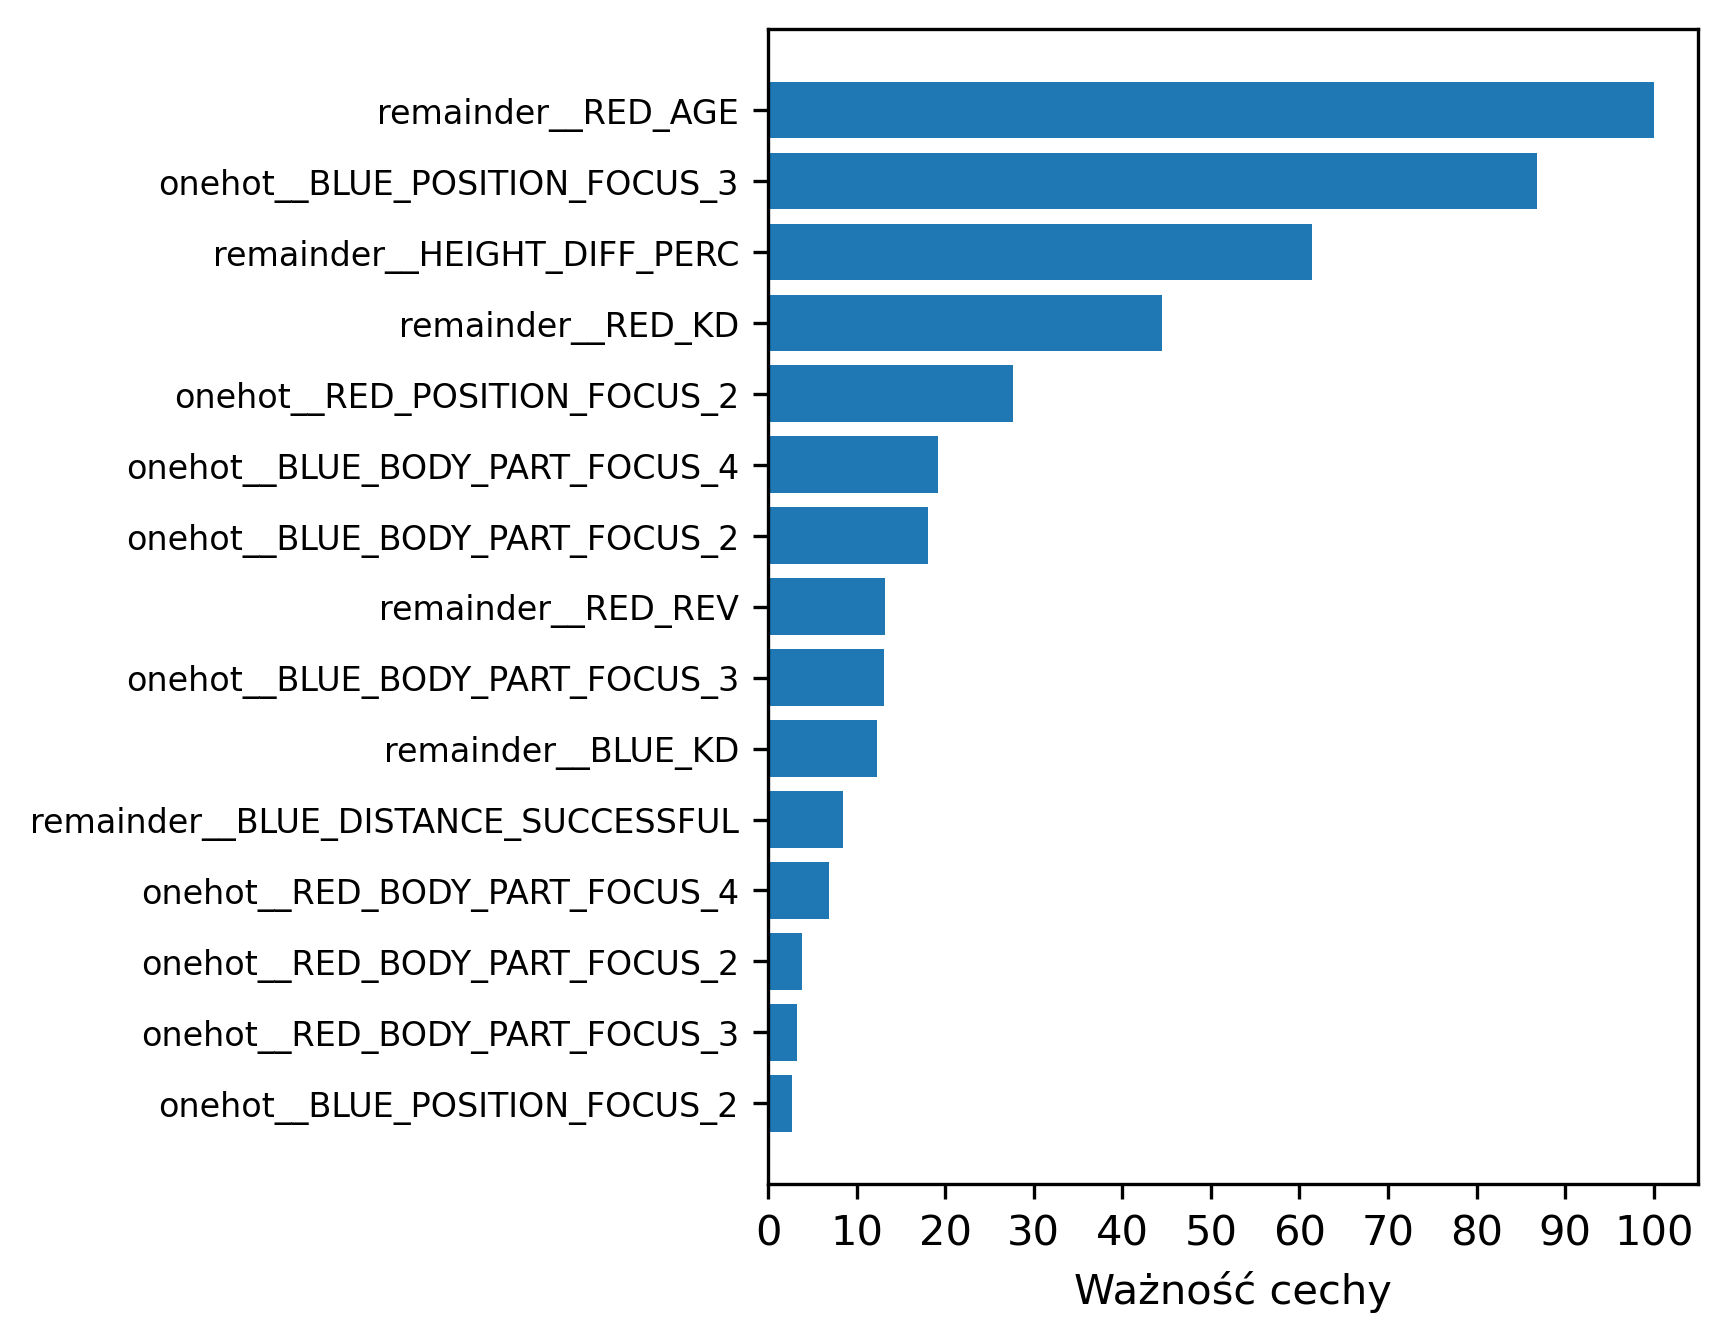

In [27]:
feature_importance = abs(logregRFE.estimator_.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-15:]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(4,5))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(col_transformer.get_feature_names_out())[sorted_idx], fontsize=8)
featax.set_xlabel('Ważność cechy')
featax.set_xticks(np.arange(0,110,10))

plt.show()

In [30]:
keep_list = logregRFE.support_
columns_to_remove = X_train.columns.values[np.logical_not(keep_list)]
columns_to_remove



array(['onehot__BLUE_BODY_PART_FOCUS_2', 'onehot__BLUE_BODY_PART_FOCUS_3',
       'onehot__BLUE_POSITION_FOCUS_2', 'remainder__REACH_DIFF_PERC',
       'remainder__HEIGHT_DIFF_PERC', 'remainder__RED_CTRL_SEC',
       'remainder__RED_LANDED_PERC_HEAD',
       'remainder__BLUE_LANDED_PERC_HEAD',
       'remainder__BLUE_LEG_SUCCESSFUL',
       'remainder__BLUE_LANDED_PERC_DISTANCE'], dtype=object)

In [31]:
X_rfe = X_train.drop(columns=columns_to_remove)

In [32]:
# compare with statsmodels
import statsmodels.api as sm
sm_model = sm.Logit(np.array(y_train), np.array(X_rfe)).fit()
print(sm_model.pvalues)
sm_model.summary(xname=X_rfe.columns.to_list())

         Current function value: 0.279831
         Iterations: 35
[3.72902208e-01 5.94373643e-01 4.31735348e-01 3.88441166e-02
 2.49013827e-01 1.64975191e-01 1.30227250e-01 3.44822282e-02
 1.31380182e-03 1.02265179e-16 1.74949613e-23 3.54042750e-03
 2.19587422e-02 2.34879847e-22 7.29523458e-16 1.19321381e-01
 7.58363123e-01 6.46110251e-09 2.11057663e-04 6.69949558e-01
 3.47432475e-07 5.14061006e-01 9.99999831e-01 4.42849643e-04
 9.99999937e-01 4.83529529e-01 6.08246677e-01 2.73294506e-01
 9.99999674e-01 4.52526148e-02 5.25661743e-01 9.99999872e-01
 4.37865883e-01 1.00661664e-01 9.99999554e-01 8.84367305e-02
 1.35333147e-01 2.28905260e-01 9.99999984e-01 3.04235038e-01
 3.22245876e-01 3.44250598e-02 3.02437018e-01]


C:\Users\Marcel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2548
Model:                          Logit   Df Residuals:                     2505
Method:                           MLE   Df Model:                           42
Date:                Sun, 25 Jun 2023   Pseudo R-squ.:                  0.5898
Time:                        08:54:18   Log-Likelihood:                -713.01
converged:                      False   LL-Null:                       -1738.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
onehot__RED_BODY_PART_FOCUS_2              -0.6542      0.734     -0.891      0.373      -2.093       0.785
onehot__RED_BODY_PART_FOCUS_3               0.3644      0.684      0.533      0.594      -0.977       1.706
onehot__RED_BODY_PART_FOCUS_4              -0.1902      0.242     -0.786      0.432      -0.664       0.284
onehot__BLUE_BODY_PART_FOCUS_4             -0.3890      0.188     -2.066      0.039      -0.758      -0.020
onehot__RED_POSITION_FOCUS_2                0.5750      0.499      1.153      0.249      -0.403       1.553
onehot__RED_POSITION_FOCUS_3                0.6353      0.458      1.389      0.165      -0.261       1.532
onehot__BLUE_POSITION_FOCUS_3               0.7734      0.511      1.513      0.130      -0.228       1.775
remainder__RED_AGE                         -0.0326      0.015     -2.114      0.034      -0.063      -0.002
remainder__BLUE_AGE                         0.0556      0.017      3.213      0.001       0.022       0.090
remainder__RED_KD                           1.7486      0.211      8.302      0.000       1.336       2.161
remainder__BLUE_KD                         -1.9946      0.200     -9.986      0.000      -2.386      -1.603
remainder__RED_SIG_STRIKE_PERC              0.0185      0.006      2.916      0.004       0.006       0.031
remainder__BLUE_SIG_STRIKE_PERC            -0.0130      0.006     -2.291      0.022      -0.024      -0.002
remainder__RED_SUB_ATT                      1.2147      0.125      9.725      0.000       0.970       1.459
remainder__BLUE_SUB_ATT                    -0.8801      0.109     -8.065      0.000      -1.094      -0.666
remainder__RED_REV                          0.2770      0.178      1.558      0.119      -0.072       0.625
remainder__BLUE_REV                        -0.0517      0.168     -0.308      0.758      -0.381       0.278
remainder__BLUE_CTRL_SEC                   -0.0048      0.001     -5.804      0.000      -0.006      -0.003
remainder__RED_TOTAL_STRIKE_SUCCESSFUL      0.0147      0.004      3.705      0.000       0.007       0.022
remainder__BLUE_TOTAL_STRIKE_SUCCESSFUL    -0.0017      0.004     -0.426      0.670      -0.010       0.006
remainder__RED_TD_SUCCESSFUL                0.2710      0.053      5.096      0.000       0.167       0.375
remainder__BLUE_TD_SUCCESSFUL              -0.0412      0.063     -0.653      0.514      -0.165       0.083
remainder__RED_HEAD_SUCCESSFUL              0.0241   1.14e+05   2.11e-07      1.000   -2.23e+05    2.23e+05
remainder__BLUE_HEAD_SUCCESSFUL            -0.0503      0.014     -3.513      0.000      -0.078      -0.022
remainder__RED_BODY_SUCCESSFUL              0.0090   1.14e+05   7.93e-08      1.000   -2.23e+05    2.23e+05
remainder__RED_LANDED_PERC_BODY            -0.0066      0.009     -0.701      0.484      -0.025       0.012
remainder__BLUE_BODY_SUCCESSFUL            -0.0105      0.020     -0.513      0.608      -0.050       0.030
r

In [33]:
sm_model = sm.Logit(np.array(y_train), np.array(X_rfe/np.std(X_rfe,0))).fit()
#print(sm_model.pvalues)
sm_model.summary(xname=X_rfe.columns.to_list())


Optimization terminated successfully.
         Current function value: 0.279831
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2548
Model:                          Logit   Df Residuals:                     2506
Method:                           MLE   Df Model:                           41
Date:                Sun, 25 Jun 2023   Pseudo R-squ.:                  0.5898
Time:                        08:55:02   Log-Likelihood:                -713.01
converged:                       True   LL-Null:                       -1738.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
onehot__RED_BODY_PART_FOCUS_2              -0.0889      0.100     -0.891      0.373      -0.285       0.107
onehot__RED_BODY_PART_FOCUS_3               0.0608      0.114      0.533      0.594      -0.163       0.285
onehot__RED_BODY_PART_FOCUS_4              -0.0931      0.118     -0.786      0.432      -0.325       0.139
onehot__BLUE_BODY_PART_FOCUS_4             -0.1923      0.093     -2.066      0.039      -0.375      -0.010
onehot__RED_POSITION_FOCUS_2                0.1111      0.096      1.153      0.249      -0.078       0.300
onehot__RED_POSITION_FOCUS_3                0.2039      0.147      1.389      0.165      -0.084       0.492
onehot__BLUE_POSITION_FOCUS_3               0.2066      0.137      1.513      0.130      -0.061       0.474
remainder__RED_AGE                         -0.1466      0.069     -2.114      0.034      -0.282      -0.011
remainder__BLUE_AGE                         0.2245      0.070      3.213      0.001       0.088       0.361
remainder__RED_KD                           0.8919      0.107      8.302      0.000       0.681       1.102
remainder__BLUE_KD                         -0.9814      0.098     -9.986      0.000      -1.174      -0.789
remainder__RED_SIG_STRIKE_PERC              0.2751      0.094      2.916      0.004       0.090       0.460
remainder__BLUE_SIG_STRIKE_PERC            -0.1957      0.085     -2.291      0.022      -0.363      -0.028
remainder__RED_SUB_ATT                      0.8945      0.092      9.725      0.000       0.714       1.075
remainder__BLUE_SUB_ATT                    -0.5886      0.073     -8.065      0.000      -0.732      -0.446
remainder__RED_REV                          0.1209      0.078      1.558      0.119      -0.031       0.273
remainder__BLUE_REV                        -0.0216      0.070     -0.308      0.758      -0.159       0.116
remainder__BLUE_CTRL_SEC                   -0.7336      0.126     -5.804      0.000      -0.981      -0.486
remainder__RED_TOTAL_STRIKE_SUCCESSFUL      0.7002      0.189      3.705      0.000       0.330       1.071
remainder__BLUE_TOTAL_STRIKE_SUCCESSFUL    -0.0773      0.181     -0.426      0.670      -0.433       0.278
remainder__RED_TD_SUCCESSFUL                0.4781      0.094      5.096      0.000       0.294       0.662
remainder__BLUE_TD_SUCCESSFUL              -0.0639      0.098     -0.653      0.514      -0.256       0.128
remainder__RED_HEAD_SUCCESSFUL              0.6797   2.92e+06   2.33e-07      1.000   -5.73e+06    5.73e+06
remainder__BLUE_HEAD_SUCCESSFUL            -1.2156      0.346     -3.513      0.000      -1.894      -0.537
remainder__RED_BODY_SUCCESSFUL              0.1107   1.14e+06   9.72e-08      1.000   -2.23e+06    2.23e+06
remainder__RED_LANDED_PERC_BODY            -0.1001      0.143     -0.701      0.484      -0.380       0.180
remainder__BLUE_BODY_SUCCESSFUL            -0.0954      0.186     -0.513      0.608      -0.460       0.269
r

In [98]:
X_rfe.head()

,onehot__RED_BODY_PART_FOCUS_2,onehot__RED_BODY_PART_FOCUS_3,onehot__RED_BODY_PART_FOCUS_4,onehot__BLUE_BODY_PART_FOCUS_4,onehot__RED_POSITION_FOCUS_2,onehot__RED_POSITION_FOCUS_3,onehot__BLUE_POSITION_FOCUS_3,remainder__RED_AGE,remainder__BLUE_AGE,remainder__RED_KD,remainder__BLUE_KD,remainder__RED_SIG_STRIKE_PERC,remainder__BLUE_SIG_STRIKE_PERC,remainder__RED_SUB_ATT,remainder__BLUE_SUB_ATT,remainder__RED_REV,remainder__BLUE_REV,remainder__BLUE_CTRL_SEC,remainder__RED_TOTAL_STRIKE_SUCCESSFUL,remainder__BLUE_TOTAL_STRIKE_SUCCESSFUL,remainder__RED_TD_SUCCESSFUL,remainder__BLUE_TD_SUCCESSFUL,remainder__RED_HEAD_SUCCESSFUL,remainder__BLUE_HEAD_SUCCESSFUL,remainder__RED_BODY_SUCCESSFUL,remainder__RED_LANDED_PERC_BODY,remainder__BLUE_BODY_SUCCESSFUL,remainder__BLUE_LANDED_PERC_BODY,remainder__RED_LEG_SUCCESSFUL,remainder__RED_LANDED_PERC_LEG,remainder__BLUE_LANDED_PERC_LEG,remainder__RED_DISTANCE_SUCCESSFUL,remainder__RED_LANDED_PERC_DISTANCE,remainder__BLUE_DISTANCE_SUCCESSFUL,remainder__RED_CLINCH_SUCCESSFUL,remainder__RED_LANDED_PERC_CLINCH,remainder__BLUE_CLINCH_SUCCESSFUL,remainder__BLUE_LANDED_PERC_CLINCH,remainder__RED_GROUND_SUCCESSFUL,remainder__RED_LANDED_PERC_GROUND,remainder__BLUE_GROUND_SUCCESSFUL,remainder__BLUE_LANDED_PERC_GROUND,remainder__GENDER
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,35.0,0.0,0.0,74.0,42.0,0.0,0.0,0.0,0.0,303.0,123.0,113.0,0.0,4.0,34.0,57.0,36.0,30.00,24.0,27.59,50.0,41.67,6.90,111.0,92.50,65.0,9.0,7.50,21.0,24.14,0.0,0.0,1.0,1.15,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0,29.0,0.0,0.0,60.0,57.0,0.0,0.0,0.0,0.0,0.0,106.0,97.0,1.0,0.0,81.0,38.0,14.0,13.59,52.0,53.61,8.0,7.77,7.22,84.0,81.55,81.0,19.0,18.45,16.0,16.49,0.0,0.0,0.0,0.00,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,34.0,33.0,0.0,0.0,90.0,58.0,1.0,0.0,0.0,0.0,0.0,20.0,18.0,1.0,0.0,8.0,3.0,2.0,20.00,0.0,0.00,0.0,0.00,57.14,1.0,10.00,6.0,2.0,20.00,0.0,0.00,7.0,70.0,1.0,14.29,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,25.0,0.0,0.0,41.0,51.0,0.0,0.0,0.0,0.0,0.0,151.0,137.0,0.0,0.0,123.0,108.0,11.0,7.59,24.0,17.52,11.0,7.59,3.65,124.0,85.52,129.0,21.0,14.48,8.0,5.84,0.0,0.0,0.0,0.00,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.0,34.0,0.0,0.0,48.0,36.0,0.0,0.0,0.0,0.0,14.0,106.0,71.0,0.0,0.0,60.0,52.0,8.0,7.55,11.0,15.49,38.0,35.85,11.27,100.0,94.34,67.0,6.0,5.66,4.0,5.63,0.0,0.0,0.0,0.00,1.0


In [ ]:
#y_pred_rfereg = logregRFE.predict(X_test)
print('Miara dokładności dla modelu z regularyzacją L1 i RFE dla zbioru uczącego: {:.3f}'.format(logregRFE.score(X_train, y_train)))
#print('Miara dokładności dla modelu z regularyzacją L1 i RFE dla zbioru testowego: {:.3f}'.format(logregRFE.score(X_test, y_test)))
#print('Miara precyzji dla modelu z regularyzacją L1 i RFE dla zbioru testowego: {:.3f}'.format(precision_score(y_test, y_pred_rfereg)))
#print('Miara F dla modelu z regularyzacją L1 i RFE dla zbioru testowego: {:.3f}'.format(f1_score(y_test, y_pred_rfereg)))

cm_ = confusion_matrix(y_test, y_pred_rfereg)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')

print(classification_report(y_test,y_pred_rfereg))

generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

lr_probs = logregRFE.predict_proba(X_test)
keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
summarize scores
print('Regresja logistyczna L1 z RFE: ROC AUC=%.3f' % (lr_auc))
calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label = None)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresja logistyczna L1 z RFE')
axis labels
plt.xlabel('1 - specyficzność modelu')
plt.ylabel('Czułość modelu')
how the legend
plt.legend()
show the plot
plt.show()

In [ ]:
rfe_35 = RFE(estimator=LogisticRegression(penalty='l1',random_state=99,solver='liblinear'), n_features_to_select=35)
rfe_35.fit(X_train, y_train)

In [ ]:

#y_pred_rfe15 = rfe_15.predict(X_test)
print('Miara dokładności dla modelu z regularyzacją L1 i RFE dla zbioru uczącego: {:.3f}'.format(rfe_35.score(X_train, y_train)))
#print('Miara dokładności dla modelu z regularyzacją L1 i RFE dla zbioru testowego: {:.3f}'.format(rfe_30.score(X_test, y_test)))
#print('Miara precyzji dla modelu z regularyzacją L1 i RFE dla zbioru testowego: {:.3f}'.format(precision_score(y_test, y_pred_rfe15)))
#print('Miara F dla modelu z regularyzacją L1 i RFE dla zbioru testowego: {:.3f}'.format(f1_score(y_test, y_pred_rfe15)))

cm_ = confusion_matrix(y_test, y_pred_rfe15)#labels = ['BLUE','RED'])
sns.heatmap(cm_, annot=True, fmt='d')#.set_title('Macierz błędnych klasyfikacji sk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')


In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_train))]

lr_probs = rfe_35.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Regresja logistyczna L1 z RFE: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label = None)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresja logistyczna L1 z RFE: AUC=%.3f' % (lr_auc))
# axis labels
plt.xlabel('1 - specyficzność modelu')
plt.ylabel('Czułość modelu')
# show the legend
plt.legend()
# show the plot
plt.show()

In [39]:
pd.DataFrame(X_train, columns = col_transformer.get_feature_names_out())

,onehot__RED_BODY_PART_FOCUS_1,onehot__RED_BODY_PART_FOCUS_2,onehot__RED_BODY_PART_FOCUS_3,onehot__RED_BODY_PART_FOCUS_4,onehot__BLUE_BODY_PART_FOCUS_1,onehot__BLUE_BODY_PART_FOCUS_2,onehot__BLUE_BODY_PART_FOCUS_3,onehot__BLUE_BODY_PART_FOCUS_4,onehot__RED_POSITION_FOCUS_1,onehot__RED_POSITION_FOCUS_2,onehot__RED_POSITION_FOCUS_3,onehot__BLUE_POSITION_FOCUS_1,onehot__BLUE_POSITION_FOCUS_2,onehot__BLUE_POSITION_FOCUS_3,scale__RED_AGE,scale__BLUE_AGE,scale__REACH_DIFF_PERC,scale__HEIGHT_DIFF_PERC,scale__RED_KD,scale__BLUE_KD,scale__RED_SIG_STRIKE_PERC,scale__BLUE_SIG_STRIKE_PERC,scale__RED_SUB_ATT,scale__BLUE_SUB_ATT,scale__RED_REV,scale__BLUE_REV,scale__RED_CTRL_SEC,scale__BLUE_CTRL_SEC,scale__RED_TD_SUCCESSFUL,scale__BLUE_TD_SUCCESSFUL,scale__RED_HEAD_SUCCESSFUL,scale__RED_LANDED_PERC_HEAD,scale__BLUE_HEAD_SUCCESSFUL,scale__BLUE_LANDED_PERC_HEAD,scale__RED_BODY_SUCCESSFUL,scale__RED_LANDED_PERC_BODY,scale__BLUE_BODY_SUCCESSFUL,scale__BLUE_LANDED_PERC_BODY,scale__RED_LEG_SUCCESSFUL,scale__BLUE_LEG_SUCCESSFUL,scale__RED_DISTANCE_SUCCESSFUL,scale__RED_LANDED_PERC_DISTANCE,scale__BLUE_DISTANCE_SUCCESSFUL,scale__BLUE_LANDED_PERC_DISTANCE,scale__RED_CLINCH_SUCCESSFUL,scale__BLUE_CLINCH_SUCCESSFUL,scale__RED_GROUND_SUCCESSFUL,scale__BLUE_GROUND_SUCCESSFUL
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.390199,-1.366176,-0.021274,-0.000742,-0.444743,1.613669,-1.420650,0.130747,-0.451936,-0.397883,-0.304000,-0.316686,-0.764746,0.419285,-0.636373,-0.577997,1.030672,0.459684,2.962282,0.862107,0.413346,-0.181989,1.208090,-0.321167,0.108922,-0.131198,1.232767,1.012468,1.604322,-0.341797,-0.677955,1.450738,-0.573910,2.740241
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.721912,0.367521,1.446976,1.581938,1.515821,-0.418772,1.135765,0.064516,-0.451936,1.097407,-0.304000,-0.316686,-0.682049,-0.581454,-0.636373,0.710486,-0.184963,-0.610722,-0.847862,-1.335097,-0.658569,-0.972922,-0.216552,0.736845,1.850761,0.096910,-0.040863,-0.200010,-0.443472,0.768147,-0.677955,-0.698378,1.139289,-0.371400
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.612622,-1.366176,0.297546,0.406397,-0.444743,-0.418772,-0.007894,-0.730260,-0.451936,1.097407,1.987690,-0.316686,-0.373315,0.000675,0.497132,0.710486,0.004980,-1.235237,0.104674,0.427543,2.069941,1.043792,-0.435728,-0.581364,2.083007,0.096910,1.348551,0.878716,0.260457,0.960268,-0.264364,-0.698378,-0.573910,-0.501052
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.390199,2.596560,1.619711,1.276193,-0.444743,-0.418772,-1.420650,0.130747,0.906004,-0.397883,-0.304000,-0.316686,-0.555248,-0.156304,-0.069621,0.066245,-0.982724,1.728963,-0.599374,0.171072,-0.950909,-1.370044,-0.545316,-0.018526,-0.820059,-0.473361,-0.996086,-1.513655,-0.795436,-1.163963,-0.540091,0.017994,-0.466835,0.147207
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.169578,0.119850,-0.868770,-0.375310,-0.444743,-0.418772,-0.344265,0.196978,0.906004,-0.397883,-0.304000,-0.316686,-0.544221,2.204918,-0.636373,3.931694,-0.526861,0.604115,0.518820,0.958774,-0.463675,0.284628,-0.106964,-0.287950,-0.820059,-0.701470,-0.532947,0.444119,-0.091507,-0.469340,-0.540091,0.017994,-0.359760,1.054769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.279889,1.110534,0.302166,0.418550,3.476384,-0.418772,1.404862,-0.001716,-0.451936,1.097407,-0.304000,-0.316686,-0.246513,-0.496424,-0.069621,0.066245,0.232911,0.653158,-0.723618,-0.712861,-0.268782,-0.362679,-0.654903,-0.434349,-0.355569,0.210965,0.045975,0.270962,-0.475469,0.576026,-0.264364,-0.411830,0.068540,-0.501052
2034,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.054645,0.615192,-0.021274,1.676426,-0.444743,1.613669,-3.237051,1.322910,-0.451936,-0.397883,-0.304000,-0.316686,-0.764746,-0.555291,-0.636373,-0.577997,-1.096690,-2.7

In [ ]:
feature_importance = abs(rfe_35.estimator_.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(6,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(col_transformer.get_feature_names_out())[sorted_idx], fontsize=8)
featax.set_xlabel('Ważność cech')

plt.show()

## Drzewa decyzyjne

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [40]:
bsetree = DecisionTreeClassifier(random_state = 99)
bsetree.fit(X_train, y_train);
#y_pred_forest_base = forest.predict(X_test)

In [41]:
threshold = 0.57
preds = np.where(bsetree.predict_proba(X_train)[:,1] > threshold, 1, 0)

pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),
                   precision_score(y_train, preds), roc_auc_score(y_train, preds)], 
             index=["Dokładność", "Czułość", "Precyzja", "Miara ROC AUC"]).T.style.hide_index()

C:\Users\Marcel\AppData\Local\Temp\ipykernel_7712\3822021941.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),


Dokładność,Czułość,Precyzja,Miara ROC AUC
1.000000,1.000000,1.000000,1.000000


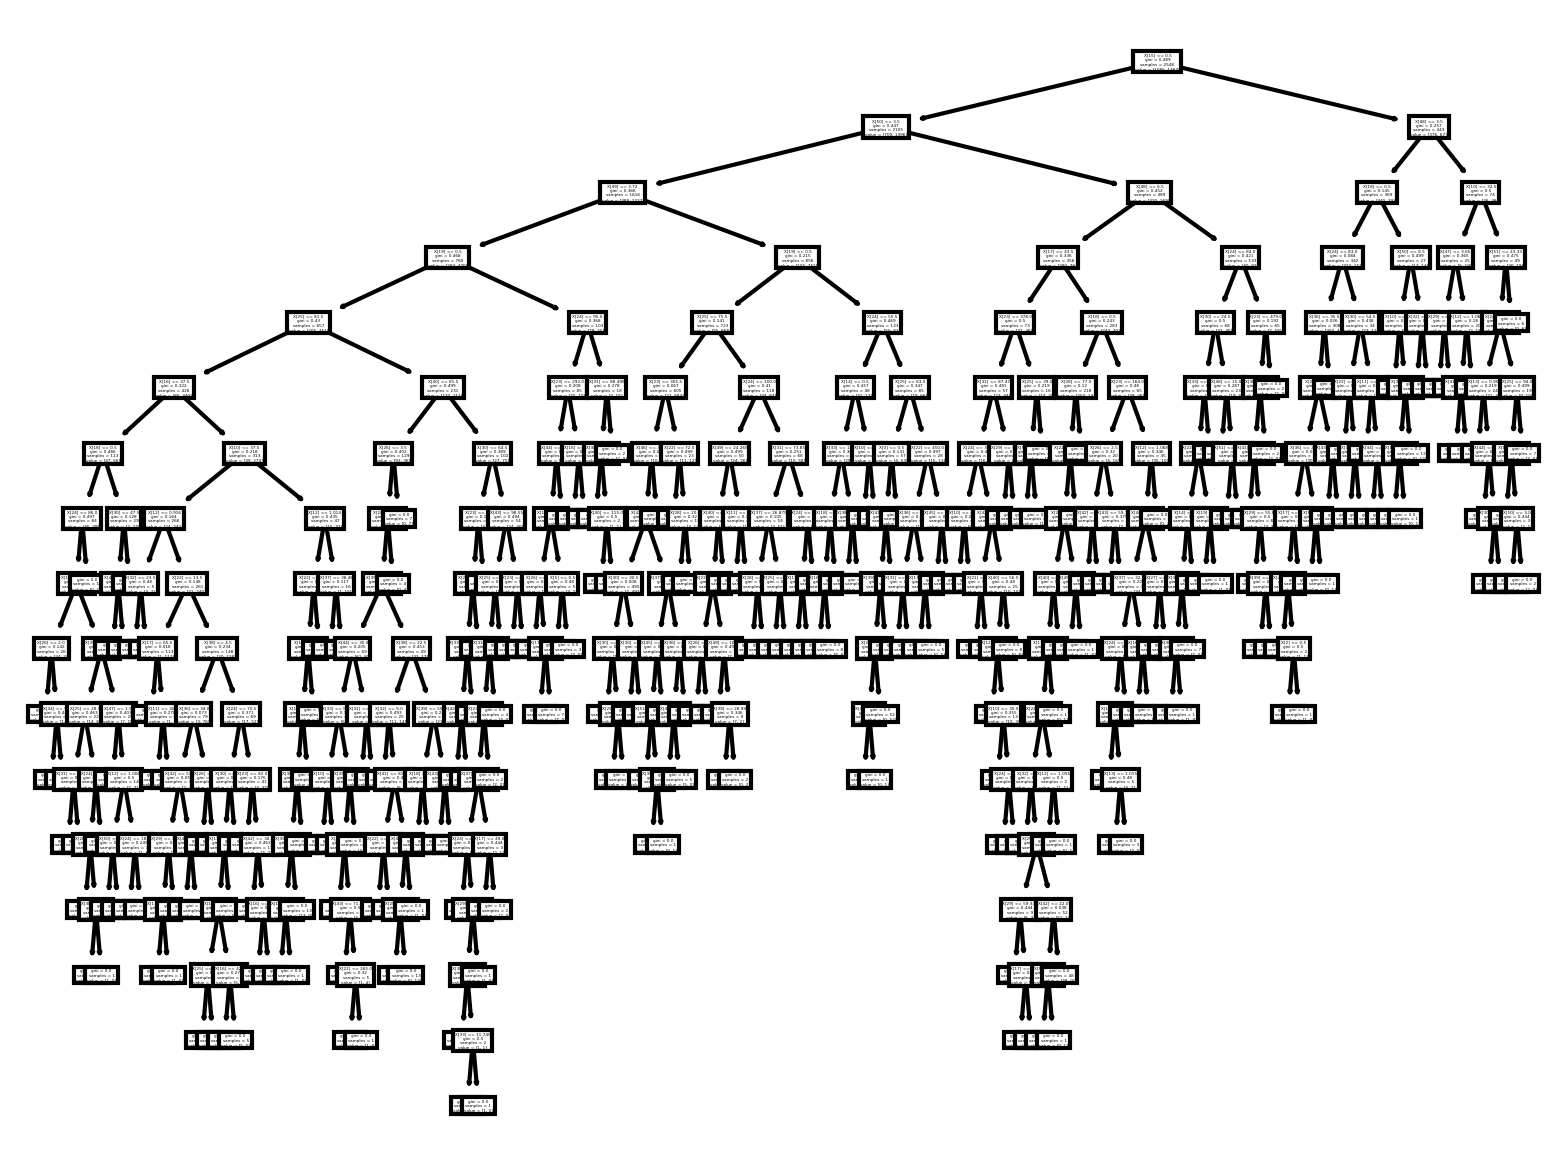

In [42]:
tree.plot_tree(bsetree)
plt.show()

In [43]:
bsetree.tree_.max_depth

16

In [44]:
bsetree.tree_.n_node_samples[16]

6

In [86]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(1,16)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10,25,50,100,200]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10,25,50,100]
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [87]:
rf_random = RandomizedSearchCV(estimator = bsetree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=99, n_jobs = -1, scoring='accuracy')# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

NameError: name 'bsetree' is not defined

In [88]:
best_rf = rf_random.best_estimator_


NameError: name 'rf_random' is not defined

In [25]:
best_tree = DecisionTreeClassifier(min_samples_split = 25, min_samples_leaf = 10, max_features='auto',max_depth=10,random_state = 99)
# Train the model on training data
best_tree.fit(X_train, y_train)

C:\Users\Marcel\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=10,
                       min_samples_split=25, random_state=99)

In [26]:
threshold = 0.57
preds = np.where(best_tree.predict_proba(X_train)[:,1] > threshold, 1, 0)

pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),
                   precision_score(y_train, preds), roc_auc_score(y_train, preds)], 
             index=["Dokładność", "Czułość", "Precyzja", "Miara ROC AUC"]).T.style.hide_index()

C:\Users\Marcel\AppData\Local\Temp\ipykernel_24388\1723885166.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  pd.DataFrame(data=[accuracy_score(y_train, preds), recall_score(y_train, preds),


Dokładność,Czułość,Precyzja,Miara ROC AUC
0.853611,0.833219,0.904303,0.857163


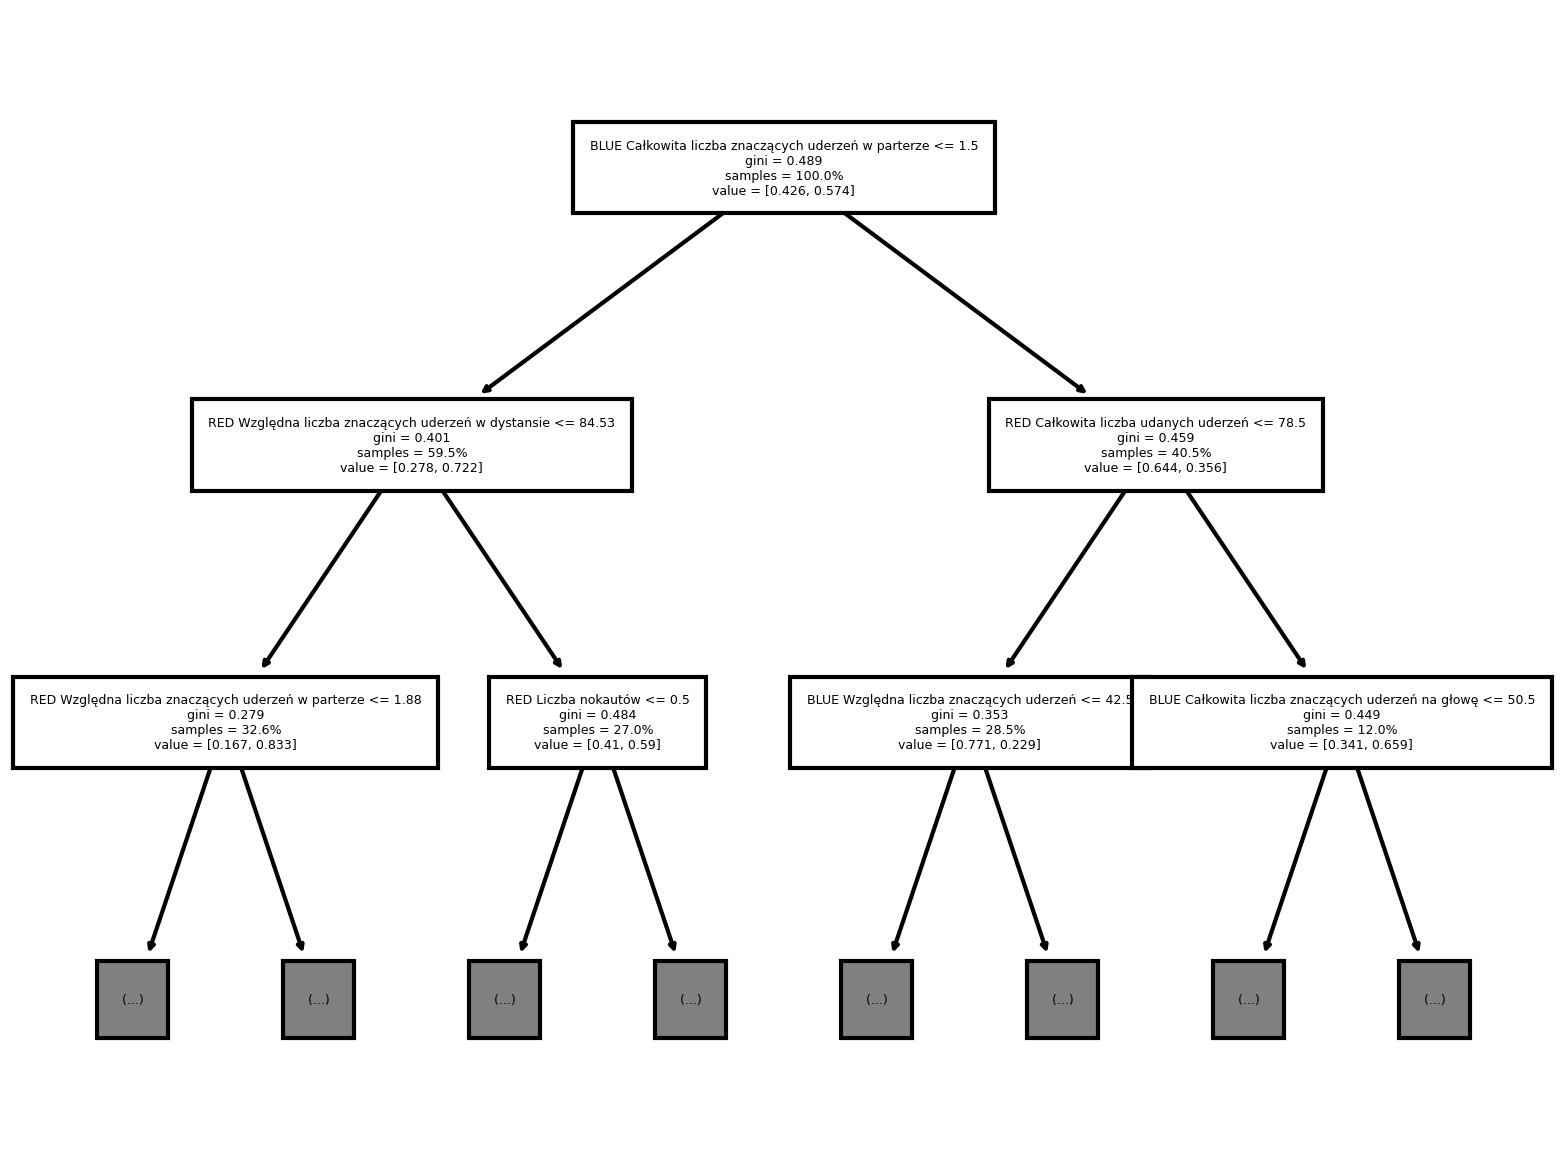

<Figure size 6000x4800 with 0 Axes>

In [62]:
tree.plot_tree(best_tree, max_depth = 2,feature_names = feature_namesPL
               , fontsize = 3, proportion=True)
plt.figure(figsize = (15,12), dpi=400)
plt.show()

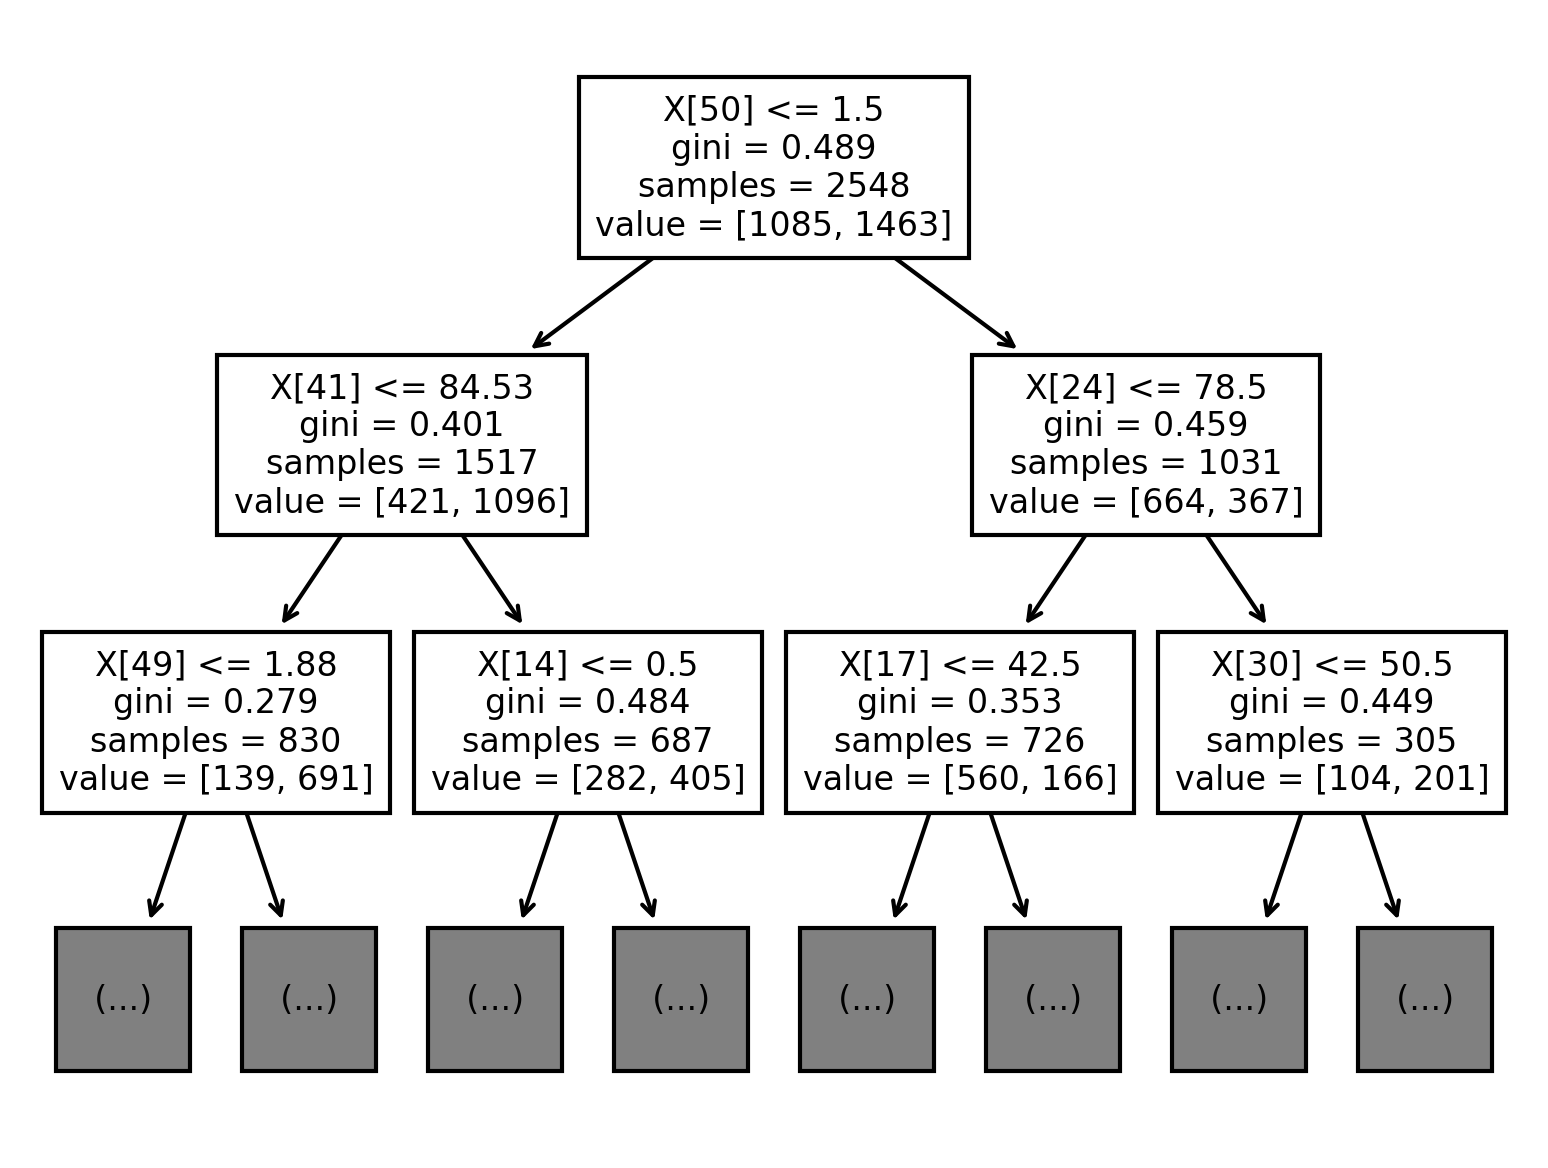

<Figure size 6000x4800 with 0 Axes>

In [59]:
tree.plot_tree(best_tree, max_depth = 2 #,feature_names = feature_namesPL
               , fontsize = 8) #, proportion=True)
plt.figure(figsize = (15,12), dpi=400)
plt.show()

In [27]:
pd.DataFrame({'Zmienna':best_tree.feature_names_in_,'Ważność':best_tree.feature_importances_})

,Zmienna,Ważność
0,onehot__RED_BODY_PART_FOCUS_2,0.000000
1,onehot__RED_BODY_PART_FOCUS_3,0.000000
2,onehot__RED_BODY_PART_FOCUS_4,0.000000
3,onehot__BLUE_BODY_PART_FOCUS_2,0.000000
4,onehot__BLUE_BODY_PART_FOCUS_3,0.000000
5,onehot__BLUE_BODY_PART_FOCUS_4,0.000000
6,onehot__RED_POSITION_FOCUS_2,0.000000
7,onehot__RED_POSITION_FOCUS_3,0.000000
8,onehot__BLUE_POSITION_FOCUS_2,0.000000
9,onehot__BLUE_POSITION_FOCUS_3,0.000000


In [32]:
feature_namesPL = ["RED Skupienie ciosów na korpus","RED Skupienie ciosów na nogi","RED Brak określonego skupienia ciosów",
                   "BLUE Skupienie ciosów na korpus","BLUE Skupienie ciosów na nogi",
                   "BLUE Brak określonego skupienia ciosów","RED Skupienie na walce w zwarciu",
                   "RED Skupienie na walce w parterze","BLUE Skupienie na walce w zwarciu",
                   "BLUE Skupienie na walce w parterze","RED Wiek","BLUE Wiek","Względna różnica w zasięgu",
                   "Względna różnica we wzroście","RED Liczba nokautów","BLUE Liczba nokautów",
                   "RED Względna liczba znaczących uderzeń","BLUE Względna liczba znaczących uderzeń",
                   "RED Liczba wykonanych dźwignii","BLUE Liczba wykonanych dźwignii","RED Liczba kontrataków",
                   "BLUE Liczba kontrataków","RED Czas trwania kontroli","BLUE Czas trwania kontroli",
                   "RED Całkowita liczba udanych uderzeń","BLUE Całkowita liczba udanych uderzeń",
                   "RED Liczba udanych powaleń przeciwnika","BLUE Liczba udanych powaleń przeciwnika",
                   "RED Całkowita liczba znaczących uderzeń na głowę","RED Względna liczba znaczących uderzeń na głowę",
                   "BLUE Całkowita liczba znaczących uderzeń na głowę","BLUE Względna liczba znaczących uderzeń na głowę",
                   "RED Całkowita liczba znaczących uderzeń na korpus","RED Względna liczba uderzeń na korpus",
                   "BLUE Całkowita liczba znaczących uderzeń na korpus","BLUE Względna liczba uderzeń na korpus",
                   "RED Całkowita liczba znaczących uderzeń na nogi","RED Względna liczba znaczących uderzeń na nogi",
                   "BLUE Całkowita liczba znaczących uderzeń na nogi","BLUE Względna liczba znaczących urderzeń na nogi",
                   "RED Całkowita liczba znaczących uderzeń w dystansie","RED Względna liczba znaczących uderzeń w dystansie",
                   "BLUE Całkowita liczba znaczących uderzeń w dystansie","BLUE Względna liczba znaczących uderzeń w dystansie",
                   "RED Całkowita liczba znaczących uderzeń w zwarciu","RED Względna liczba znaczących uderzeń w zwarciu",
                   "BLUE Całkowita liczba znaczących uderzeń w zwarciu","BLUE Względna liczba znaczących uderzeń w zwarciu",
                   "RED Całkowita liczba znaczących uderzeń w parterze","RED Względna liczba znaczących uderzeń w parterze",
                   "BLUE Całkowita liczba znaczących uderzeń w parterze","BLUE Względna liczba znaczących uderzeń w parterze",
                   "Płeć zawodnika"]

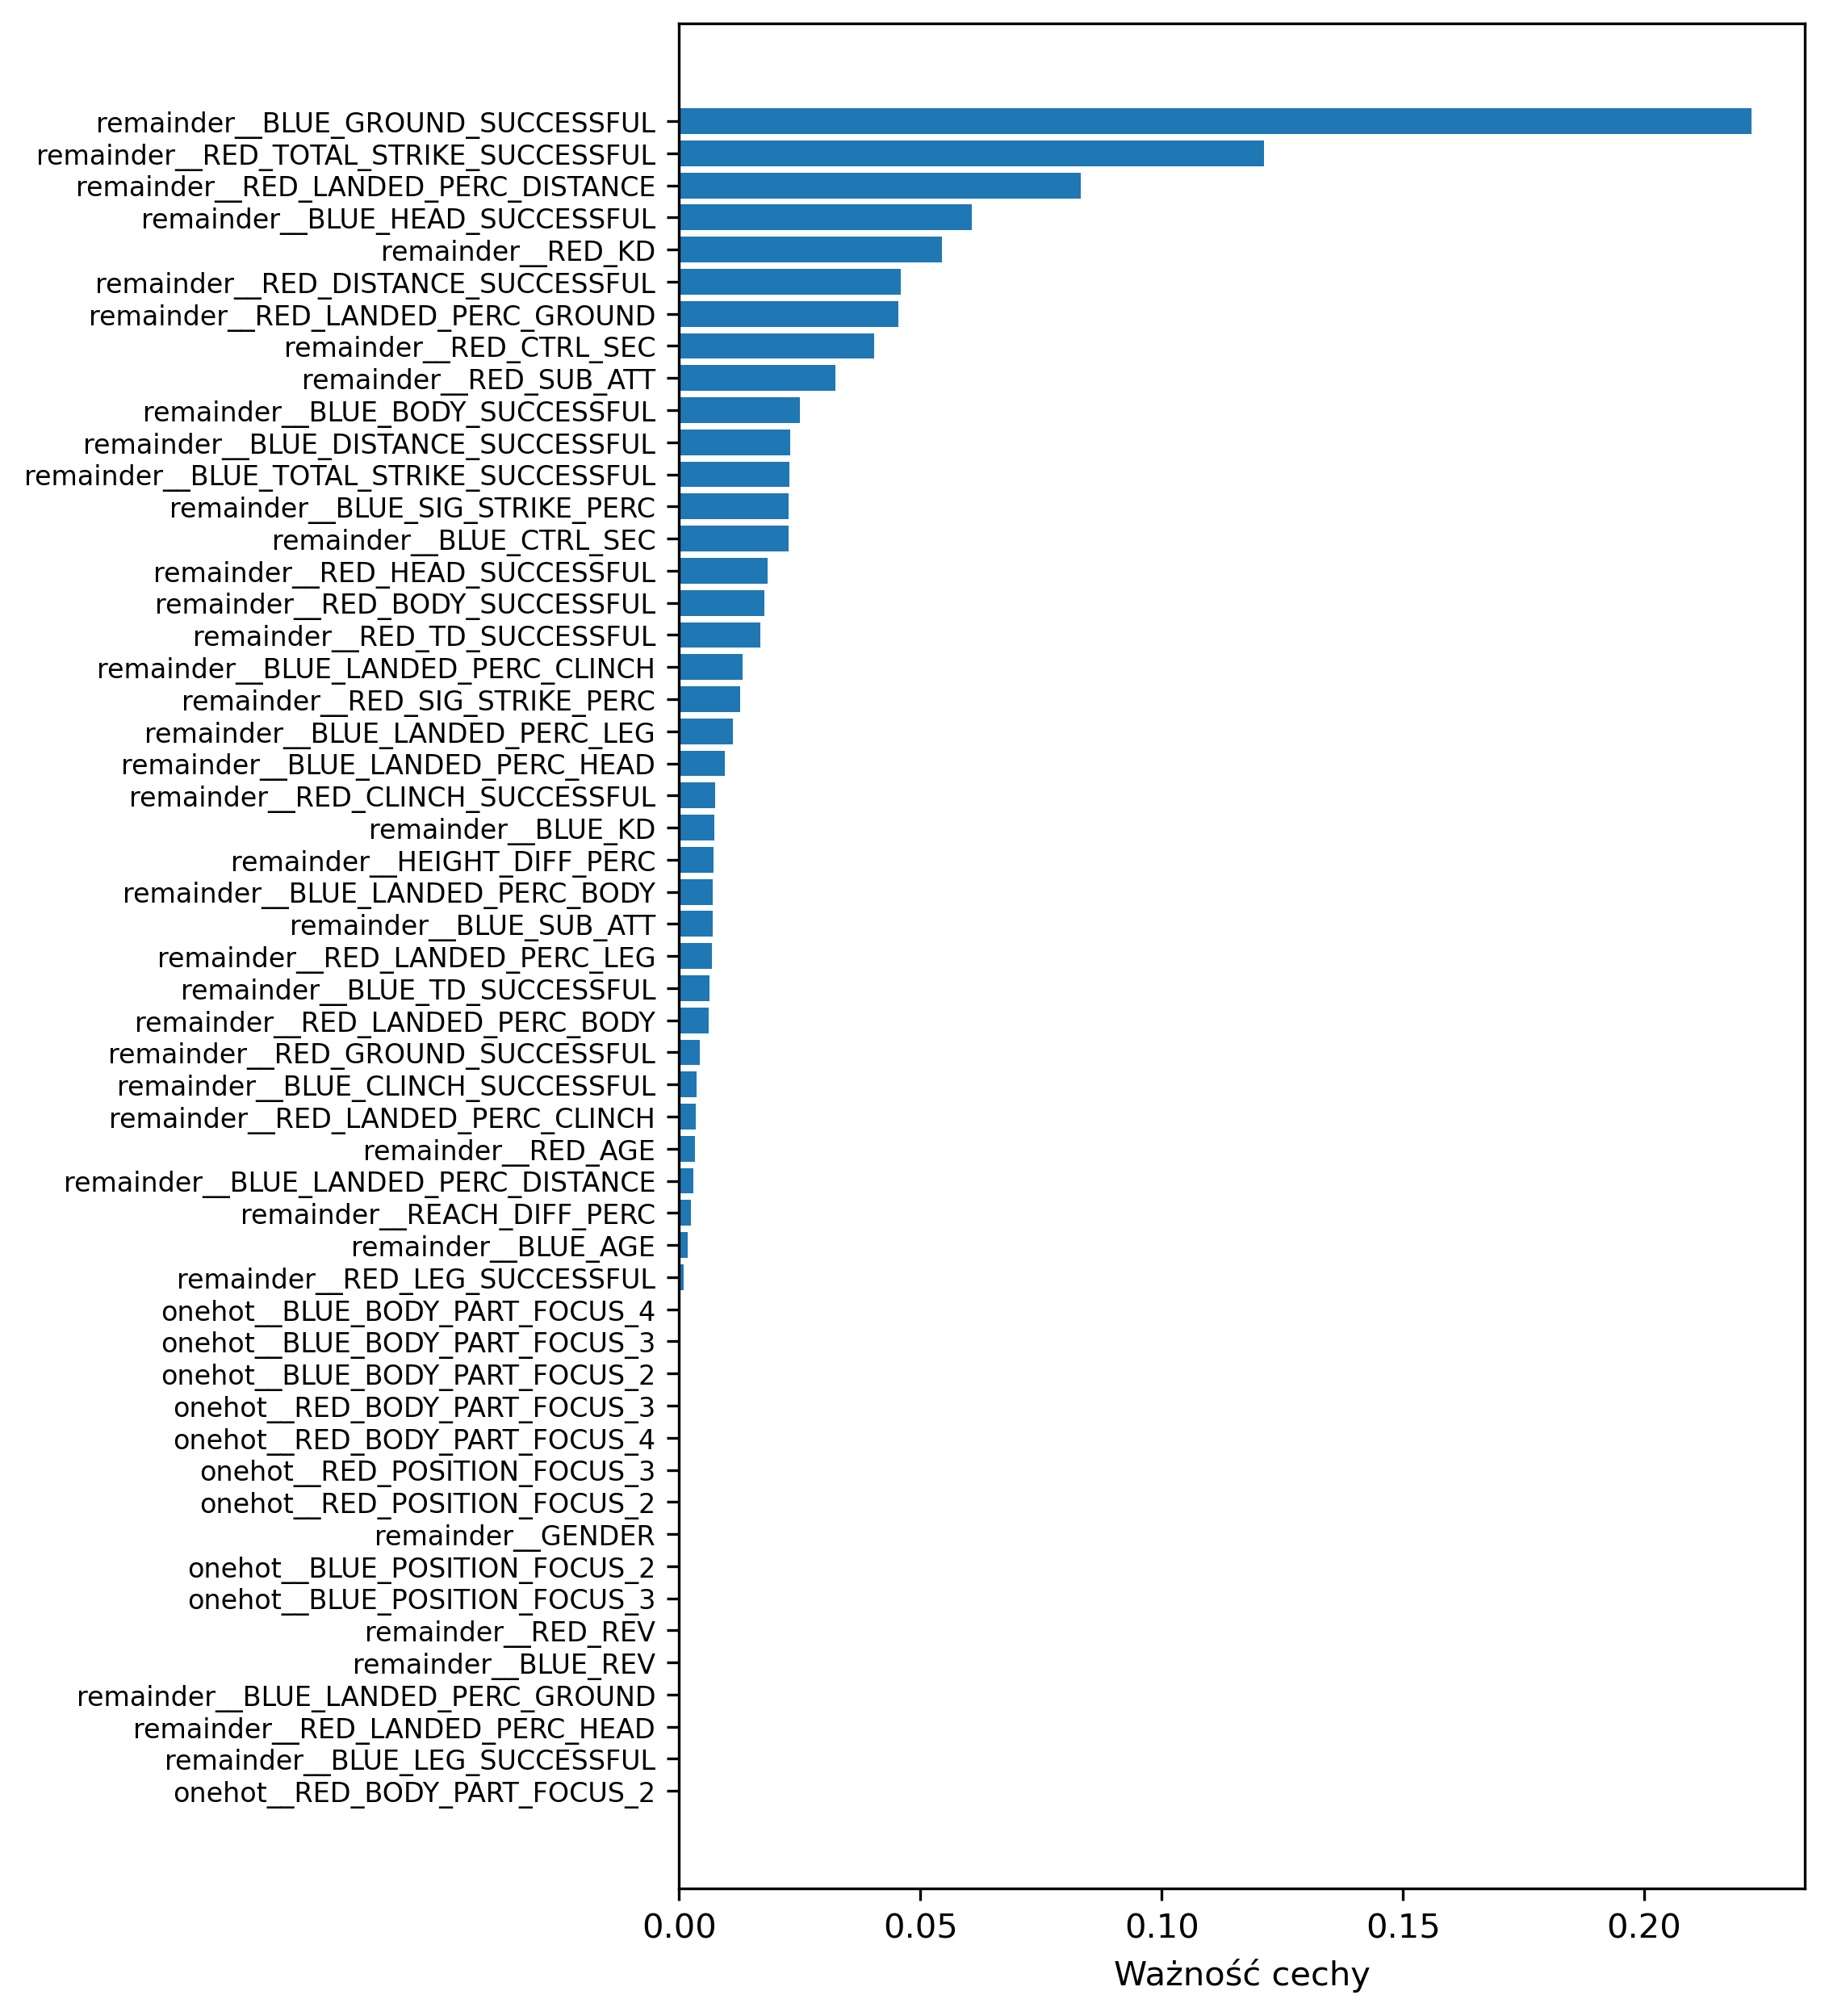

In [33]:
feature_importance = best_tree.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(6,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(col_transformer.get_feature_names_out())[sorted_idx], fontsize=8)
featax.set_xlabel('Ważność cechy')

plt.show()

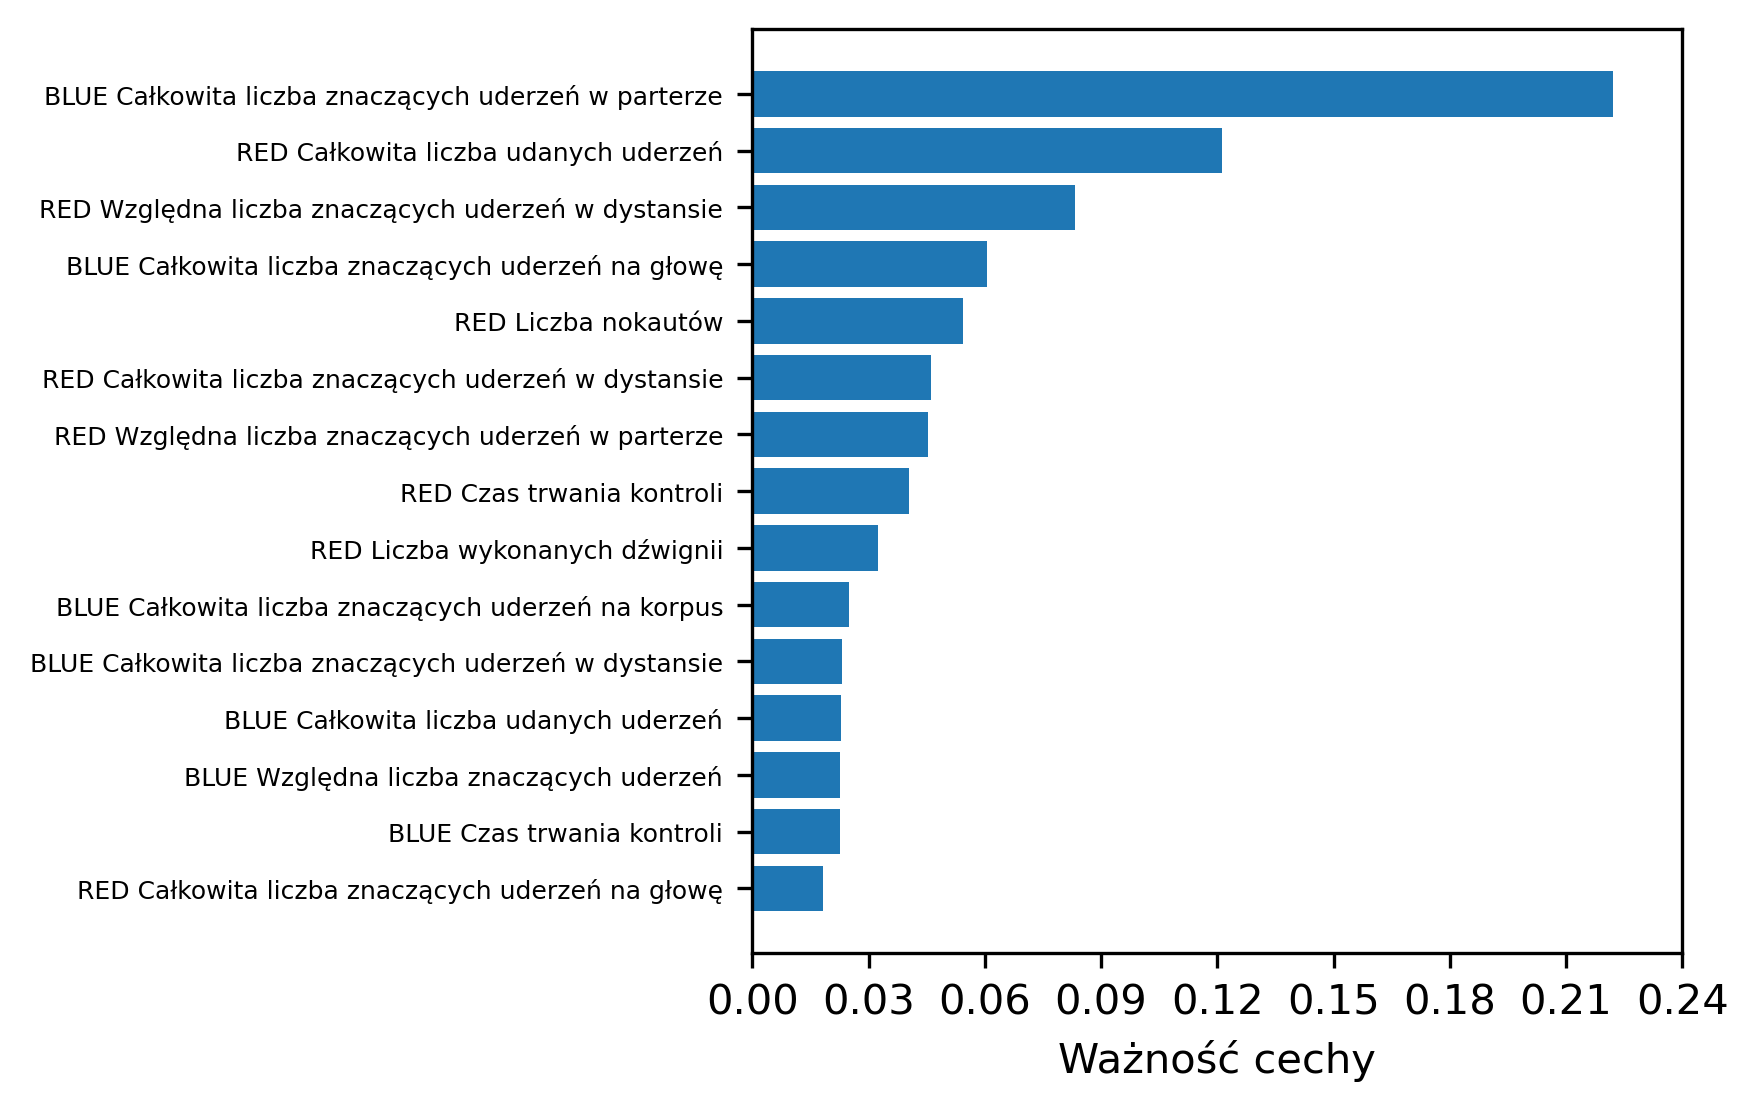

In [63]:
feature_importance = best_tree.feature_importances_
sorted_idx = np.argsort(feature_importance)[-15:]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(4,4))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(feature_namesPL)[sorted_idx], fontsize=6)
featax.set_xlabel('Ważność cechy')
featax.set_xticks(np.arange(0.00,0.25,0.03), fontsize = 6)
#featax.set_xticklabels(labels = [np.arange(0.00,0.25,0.03)],fontsize=6)

plt.show()